# Исследование факторов, влияющих на коммерческий успех компьютерных игр

**Описание проекта**: Интернет-магазин  «Стримчик» занимается продажей компьютерных игр по всему миру. Для оптимизации маркетинговых кампаний и выбора перспективных игровых продуктов важно заранее определить критерии успешной игры. Анализ исторических данных о продажах, оценках пользователей и экспертов, жанрах и платформах (Xbox, PlayStation и др.) позволит выявить значимые закономерности и повысить точность прогнозирования спроса.

**Цель исследования**: Выявить ключевые факторы, определяющие популярность компьютерной игры и её потенциал для успешного продвижения на рынке в разных регионах. Полученные выводы будут использованы для планирования рекламных мероприятий и определения стратегии закупок новых игр.

**Ход исследования:**

- *Шаг 1.* Подготовка данных: загрузка и изучение общей информации из предоставленного датасета.
- *Шаг 2.* Предобработка данных: обработка пропущенных значений, корректировка типа данных, дубликатов и других аномалий.
- *Шаг 3.* Исследовательский анализ данных: изучение основных параметров игр, их распределения по жанрам и платформам, зависимости продаж от отзывов критиков и пользователей.
- *Шаг 4.* Составление портрета пользователя: изучение самых популярных платформ, жанров и рейтингов для трех различных регионов (Северная Америка, Европа и Япония). 
- *Шаг 5.* Проверка гипотез: проведение статистических тестов для проверки гипотез.

**Общий вывод**: По итогам проведенного анализа удастся сформулировать рекомендации относительно особенностей игрового продукта, повышающего шансы на высокие продажи. Эти рекомендации станут основой для разработки эффективной рекламной стратегии и формирования ассортимента магазина.

**Описание данных**

Перед нами данные до 2016 года, со следующими признаками:
- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию («Для взрослых», «Для детей младшего возраста», «Для подростков»).


In [1]:
# Импортируем библиотеки, которые понадобятся для работы над проектом. 

# для датафрейма 
import pandas as pd
import numpy as np
from datetime import datetime, date, time

# для визуализации 
import matplotlib.pyplot as plt 
import seaborn as sns

# для статистики
from scipy import stats as st

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Загрузка данных.


In [2]:
# Считаем данные из csv-файла в датафрейм и сохраните в переменные. 

try:
    data_games = pd.read_csv('datasets/games.csv')
except:
    data_games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data_games.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Выберем все числовые столбцы из таблицы и проверим результат. 

data_number = data_games.select_dtypes(include='number')
data_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_of_Release  16446 non-null  float64
 1   NA_sales         16715 non-null  float64
 2   EU_sales         16715 non-null  float64
 3   JP_sales         16715 non-null  float64
 4   Other_sales      16715 non-null  float64
 5   Critic_Score     8137 non-null   float64
dtypes: float64(6)
memory usage: 783.6 KB


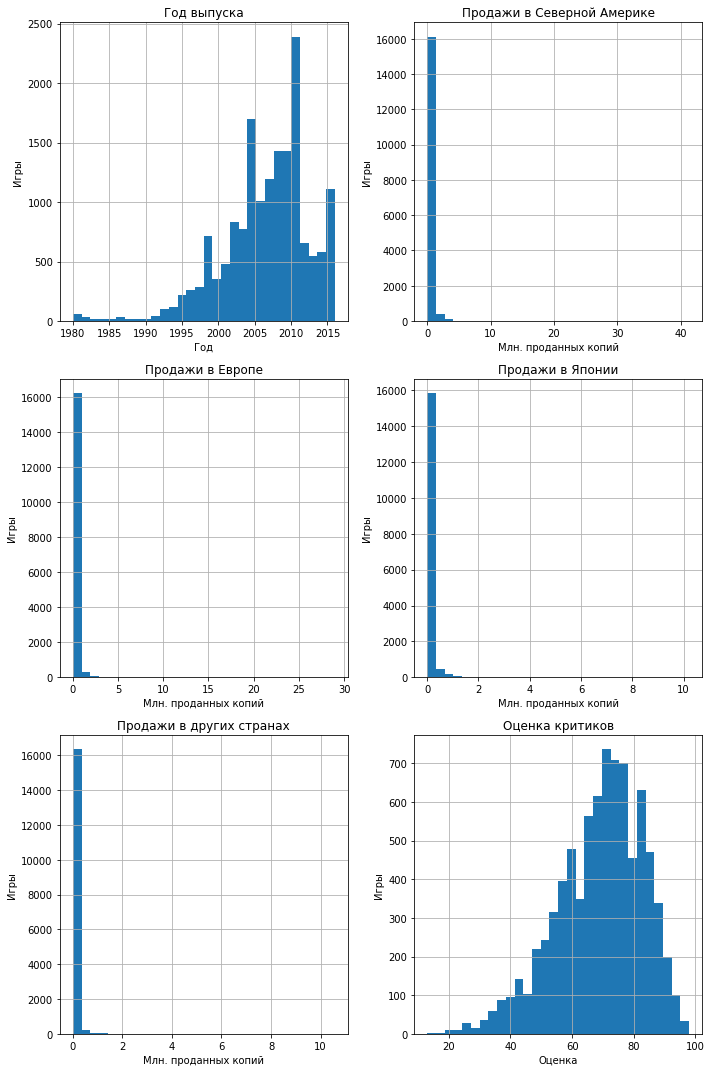

In [7]:
# Построим гистограмму для всех числовых столбцов таблицы на одном графике.

fig, axes = plt.subplots(3, 2, figsize=(10, 15))  
axes = axes.flatten()  # Преобразуем массив двумерный в одномерный

columns = ['Year_of_Release', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score']
titles = ['Год выпуска', 'Продажи в Северной Америке', 'Продажи в Европе', 
          'Продажи в Японии', 'Продажи в других странах', 'Оценка критиков']
xlabels = ['Год', 'Млн. проданных копий', 'Млн. проданных копий', 'Млн. проданных копий',
           'Млн. проданных копий', 'Оценка']

for ax, col, title, xlabel in zip(axes, columns, titles, xlabels):
    data_number[col].hist(ax=ax, bins=30, grid=True)
    ax.set(title=title, xlabel=xlabel, ylabel='Игры')

plt.tight_layout()
plt.show()

**Комментарии**

**Выводы**

Полученные данные мы сохранили в переменную data_games, в нем находится исторические данные о продаже игр: название игры, платформа, год выпуска, жанр игры, количество проданных копий в разных регионах (Северной Америке, Европе, Японии и в других странах), оценка критиков, оценка пользователей, рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию («Для взрослых», «Для детей младшего возраста», «Для подростков»). 

В нескольких столбцах имеются пропуски данных: `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`.    Также в дальнейшем на этапе предобработки потребуется изменить тип данных в нескольких столбцах. 

## Подготовка и предобработка данных.

### Заменяем названия столбцов. 

In [8]:
# Выведем название всех колонок отдельно

data_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [9]:
# Приведем нижнему регистру

data_games.columns = data_games.columns.str.lower()


In [10]:
# Проверим результат

data_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование типов данных.  


In [11]:
# Выведем общую информацию о всех столбцах в датафрейме

data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Комментарии**

На данном этапе имеет смысл изменить тип данных в столбцах `year_of_release` с `float` на `int`, так как он содержит данные  о годе выпуска игры, это целое число. В столбце `user_score` изменить тип данных с `object` на `float`, так как рейтинг игр - это числовая характеристика, изучив общую информацию о датафрейме видно, что рейтинг может иметь нецелое значение. Перед изменением типов данных посмотрим список уникальных значений для исключения ошибок.

In [12]:
# Посмотрим уникальные значения столбца 'year_of_release'

print(data_games['year_of_release'].sort_values().unique())

[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.   nan]


In [13]:
# Посмотрим уникальные значения столбца 'user_score'

print(data_games['user_score'].sort_values().unique())

['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]


In [14]:
# Посчитаем количество значений 'tbd' в столбце 'user_score'

print((data_games['user_score'] == 'tbd').sum())

2424


**Комментарии**

Аббревиатуру 'tbd' в столбце с оценкой пользователей обозначает 'to be determined' (будет определено), то есть оценки игры пока нет. Это строковое значение, поэтому перед изменением типа данных в этом столбце нужно заменить его на числовое. Так как рейтинга у игр нет, можно изменить 'tbd' на NaN, что произойдет при изменении типа данных.

In [15]:
# Изменим тип данных в указанных столбцах с оставшимися пропусками

data_games['year_of_release'] = pd.to_numeric(data_games['year_of_release'], errors='coerce').astype('Int64')
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce')


In [16]:
# Проверим результат

data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Обработка пропусков. 


In [17]:
# Выведем количество пропущенных значений для каждого столбца.

print('Пропущенные значения в "data_games"')
data_games.isna().sum()

Пропущенные значения в "data_games"


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [18]:
# Посмотрим долю пропущенных значений 

pd.DataFrame(round(data_games.isna().mean()*100,1)).style.background_gradient('coolwarm')

**Комментарии**

Доля пропущенных значений в столбцах `name`, `year_of_release` и `genre` незначительна, меньше 5%, такие пропуски можно удалить. Доля пропусков в столбцах `critic_score`, `user_score` и `rating` составляет практически половину всех данных, для обработки таких значений потребуется поиск оптимального решения для каждого из столбцов отдельно.

#### Обработка пропусков в столбце `name` и  `genre`

In [19]:
# Выведем данные по столбцу 'name' 

print('Количество пропусков:', data_games['name'].isna().sum())
print(data_games[data_games['name'].isna()])

Количество пропусков: 2
      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


**Комментарии**

Количество пропусков в столбце `name` всего 2 строки, по данным видно, что это игры за 1993 год, в остальных столбцах тоже есть пропуски. Так здесь же находятся пропуски из столбца `genre`. Такие данные можно удалить.

In [20]:
# Удалим пропуски в столбце 'name'

data_games = data_games.dropna(subset=['name'])


In [21]:
# Проверим результат

print('Количество пропусков:', data_games['name'].isna().sum())

Количество пропусков: 0


#### Обработка пропусков в столбце `year_of_release`

In [22]:
# Выведем данные по столбцу 'year_of_release' 

print('Количество пропусков:', data_games['year_of_release'].isna().sum())
print(data_games['year_of_release'].sort_values().unique())

Количество пропусков: 269
<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, <NA>]
Length: 38, dtype: Int64


**Комментарии**

Количество пропусков в столбце `year_of_release` не велико, примерно 1,5%. Так как восстановить каждое пропущенное значение не представляется возможным, мы также удалим эти данные, чтобы не исказить распределение и выводы о временных данных. 

In [26]:
# Удалим пропуски в столбце 'year_of_release'

data_games = data_games.dropna(subset=['year_of_release'])

In [27]:
# Проверим результат

print('Количество пропусков:', data_games['year_of_release'].isna().sum())

Количество пропусков: 0


#### Обработка пропусков в столбце `critic_score`

In [28]:
# Выведем данные по столбцу 'critic_score' 

print('Количество пропусков:', data_games['critic_score'].isna().sum())
print('Минимальная оценка игры критиками:', data_games['critic_score'].min())
print('Максимальная оценка игры критиками:', data_games['critic_score'].max())
print('Медианная оценка игры критиками:', data_games['critic_score'].median())
print('Средняя оценка игры критиками:', data_games['critic_score'].mean())
print(data_games['critic_score'].sort_values().unique())

Количество пропусков: 8461
Минимальная оценка игры критиками: 13.0
Максимальная оценка игры критиками: 98.0
Медианная оценка игры критиками: 71.0
Средняя оценка игры критиками: 68.99436302142053
[13. 17. 19. 20. 21. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. nan]


**Комментарии**

По данным об оценках игр критиками видно, что вариативность значений довольно высокая, нулевых значений нет. При этом медианное и среднее значение близки друг к другу. Пропусков больше половины всех данных, однако предположить какую оценку получили эти игры мы не можем. Пропуски могли возникнуть по разным причинам, одна из которых это то, что такие игры просто еще не проходили оценивание критиками. В таком случае оптимальнее будет оставить пропуски без изменений. 

#### Обработка пропусков в столбце `user_score`

In [31]:
# Выведем данные по столбцу 'user_score' 

print('Количество пропусков:', data_games['user_score'].isna().sum())
print('Минимальная оценка игры пользователями:', data_games['user_score'].min())
print('Максимальная оценка игры пользователями:', data_games['user_score'].max())
print('Медианная оценка игры пользователями:', data_games['user_score'].median())
print('Средняя оценка игры пользователями:', data_games['user_score'].mean())
print(data_games['user_score'].sort_values().unique())

Количество пропусков: 8981
Минимальная оценка игры пользователями: 0.0
Максимальная оценка игры пользователями: 9.7
Медианная оценка игры пользователями: 7.5
Средняя оценка игры пользователями: 7.126329894144447
[0.  0.2 0.3 0.5 0.6 0.7 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.
 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8
 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6
 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4
 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2
 9.3 9.4 9.5 9.6 9.7 nan]


**Комментарии**

По данным об оценках игр пользователями видно, что вариативность значений довольно высокая. При этом медианное и среднее значение близки друг к другу. Пропусков больше половины всех данных. Также изначально у нас были данные со значением 'tbd', которые преобразовались в NaN. Мы не можем предположить какую оценку поставят пользователи, также как и с оценкой от критиков, поэтому оставим эти пропуски тоже без изменений. 

#### Обработка пропусков в столбце `rating`

In [34]:
# Выведем данные по столбцу 'rating' 

print('Количество пропусков:', data_games['rating'].isna().sum())
print(data_games['rating'].sort_values().unique())

Количество пропусков: 6676
['AO' 'E' 'E10+' 'EC' 'K-A' 'M' 'RP' 'T' nan]


**Комментарии**

Аббревиатуры рейтингов в таблице означают следующее:
- AO - Adults Only (Только для взрослых)
- E - Everyone (Для всех возрастов)
- E10+ - Everyone 10+ (От 10 лет и старше)
- EC -Early Childhood (Детям раннего возраста)
- K-A	- Kids to Adults (Устаревший рейтинг, аналогичен "E")
- M - Mature (От 17 лет и старше)
- RP - Rating Pending (Рейтинга пока нет)
- T - Teen (Подросткам от 13 лет и старше)

Так как пропусков достаточно много (40%), но точно сказать какой рейтинг у каждой игры на основании других данных в датафрейме мы не можем, оптимальным вариантом заполнения пропусков будет значение RP (рейтинга пока нет). При покупке игр для детей рейтинг является важной характеристикой, поэтому такой вариант будет более безопасным для магазина.

In [35]:
# Заменим пропущенные значения в столбце 'rating' значением RP
   
data_games.loc[data_games['rating'].isna(), 'rating'] = 'RP'

In [36]:
# Проверим результат

print('Количество пропусков:', data_games['rating'].isna().sum())

Количество пропусков: 0


In [37]:
# Проверим финальный результат удаления пропусков

print('Пропущенные значения в "data_games"')
data_games.isna().sum()

Пропущенные значения в "data_games"


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

**Комментарии**

Все пропуски удалены.


### Суммарные продажи во всех регионах.

In [38]:
# Функция для расчета продаж

def calculate_sales(row):
    return (row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']) 


In [39]:
# Посчитаем суммарные продажи во всех регионах и добавим их в отдельный столбец

data_games['all_sales'] =  data_games.apply(calculate_sales, axis=1)

# Проверяем результат
data_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,RP,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,RP,28.31


**Комментарии**

Для подсчета суммарных продаж игр во всех регионах мы написали функцию, которая суммирует данные из столбцов `na_sales`, `eu_sales`, `jp_sales` и `other_sales`, и возвращает результат. Затем применили функцию к строкам датафрейма и сохранили результат в новом столбце `all_sales`.

### Обработка дубликатов

In [40]:
# Проверим есть ли в данных явные строки-дубликаты. 

print('Количество явных дубликатов:', data_games.duplicated().sum())


Количество явных дубликатов: 0


In [41]:
# Проверим есть ли в данных неявные дубликаты

data_games[data_games[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


In [42]:
# Удаляем дубликат из оригинала

data_games = data_games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

# Проверим результат

data_games[data_games[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales


**Комментарии**

Явных дубликатов в датафрейме не обнаружилось, но есть один неявный дубликат, название игры, платформа и год выпуска у которого совпадают, а данные о продажах нет. В случае с таким дубликатом мы оставили более информативное первое вхождение.

**Выводы** 

В текущем разделе проекта мы провели основную предобработку данных в датафреймах, которая включала в себя приведение названий столбцов к нижнему регистру, преобразование типа данных в столбцах, где это необходимо, обработку пропусков и дубликатов, подсчет суммарных продаж по всем регионам. 

Так пропуски в столбцах `name`, `genre` и `year_of_release` мы удалили, так как их количество было незначительным, а восстановить пропущенные значение не представляется возможным. Пропуски в столбцах `critic_score` и `user_score` мы оставили, так как мы не можем предположить какую оценку игре поставят критики или пользователи, эти параметры никак не связаны с другими данными в датафрейме. Пропусков в столбце `rating` было достаточно много (40%), но точно сказать какой рейтинг у каждой игры на основании других данных в датафрейме мы не можем, поэтому оптимальным вариантом заполнения пропусков выбрали значение RP (рейтинга пока нет). При покупке игр для детей рейтинг является важной характеристикой, поэтому такой вариант будет более безопасным для магазина.


## Исследовательский анализ данных


### Выпуск игр в разные годы. 

In [44]:
# Создаем сводную таблицу по годам выпуска игр

games_per_year = data_games.pivot_table(
    index='year_of_release',
    values='name',
    aggfunc='count'
).reset_index()

# Проверим результат и отсортируем таблицу по возрастанию

games_per_year = games_per_year.sort_values(by='year_of_release', ascending=True)
games_per_year.head(5)

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


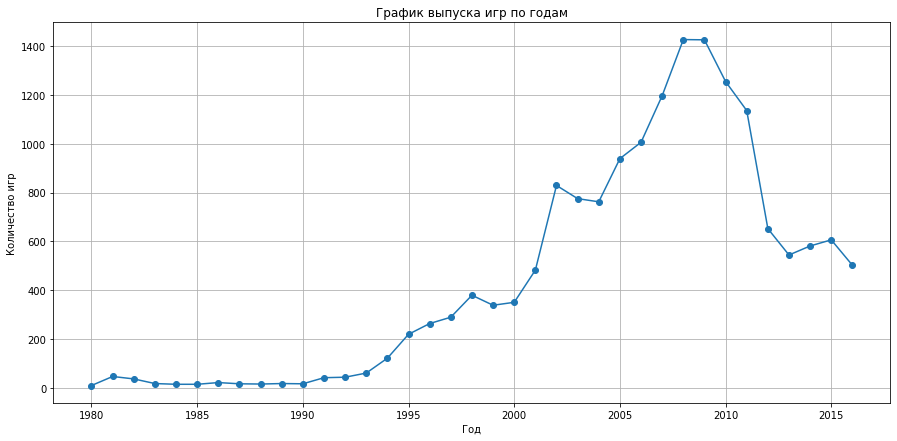

Год начала выпуска игр в датафрейме: 1980
Последний год выпуска игр в датафрейме: 2016


In [45]:
# Создание линейного графика количества выпуска игр по годам 

plt.figure(figsize=(15, 7))            
plt.plot(games_per_year['year_of_release'], games_per_year['name'], marker='o') 

plt.title('График выпуска игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.grid()
plt.show()

print('Год начала выпуска игр в датафрейме:', data_games['year_of_release'].min())
print('Последний год выпуска игр в датафрейме:', data_games['year_of_release'].max())

**Комментарии**

В датафрейме у нас представлены данные о продаже игр с 1980 по 2016 год. По гистограмма видно, что до 1995 года выпускалось минимальное количество компьютерных игр. Это вполне очевидно, так как до этого периода персональные компьютеры и игровые приставки в семьях были не сильно распространены. Один из первых пиков в количестве выпуска игр приходится на 1998 год. Также важно отметить, что разработка компьютерной игры довольно трудоемкий и длительный по времени процесс, это может объяснить неравномерное распределения количества игр по годам. После пикового значения по количеству выпущенных игр следует резкий спад на несколько лет, такой паттерн повторяется несколько раз в период с 1998 по 2016 год. На наш взгляд, именно этот период имеет смысл анализировать более подробно.


### Продажи игр по платформам. 

In [46]:
# Посмотрим все уникальные значения платформ в датафрейме

print('Количество платформ:', len(data_games['platform'].unique()))
print(data_games['platform'].unique())

Количество платформ: 31
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [47]:
# Сводная таблица продаж игр по платформам 

pivot_platform = data_games.pivot_table(
    index='platform',
    values='all_sales',
    aggfunc='sum'
)

# Отсортируем данные по сумме продаж по убыванию 

pivot_platform.sort_values(by='all_sales', ascending=False)

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


**Комментарии**

Всего в датафрейме представлены 31 разная платформа. Для дальнейшего анализа мы остановимся на Топ-5 платформ по с наибольшими суммарными продажами:
1. PS2 - PlayStation 2 (1255.77 млн. проданных копий)
2. X360 - Xbox 360	(971.42 млн. проданных копий)
3. PS3 - PlayStation 3 (939.65 млн. проданных копий)
4. Wii - Nintendo Wii (907.51 млн. проданных копий)
5. DS - Nintendo DS (806.12 млн. проданных копий)

In [48]:
# Сохраняем список Топ 5 платформ для дальнейшего анализа 

top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

# Создаем новый датафрейм с отсортированными данными

top_games = data_games[data_games['platform'].isin(top_platforms)].reset_index(drop=True)

# Проверяем результат

top_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
8066,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
8067,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
8068,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,RP,0.00
8069,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01


In [49]:
# Агрерируем таблицу суммарных продаж по платформам по годам 

top_sales_by_year = top_games.groupby(['platform', 'year_of_release']).agg(
    total_sales=('all_sales', 'sum')
).reset_index()

# Проверяем результат

top_sales_by_year.head(5)

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94


In [50]:
# Фильтруем строки, исключив ту, где platform равно 'DS' и year_of_release равно 1985

# Удаляем для агрегированной таблицы

top_sales_by_year = top_sales_by_year[(top_sales_by_year['platform'] != 'DS') | \
                                      (top_sales_by_year['year_of_release'] != 1985)]

# Удаляем для всего датафрейма

data_games = data_games[(data_games['platform'] != 'DS') | (data_games['year_of_release'] != 1985)]

# Проверяем результат

top_sales_by_year.head(5)

,platform,year_of_release,total_sales
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
5,DS,2008,145.31


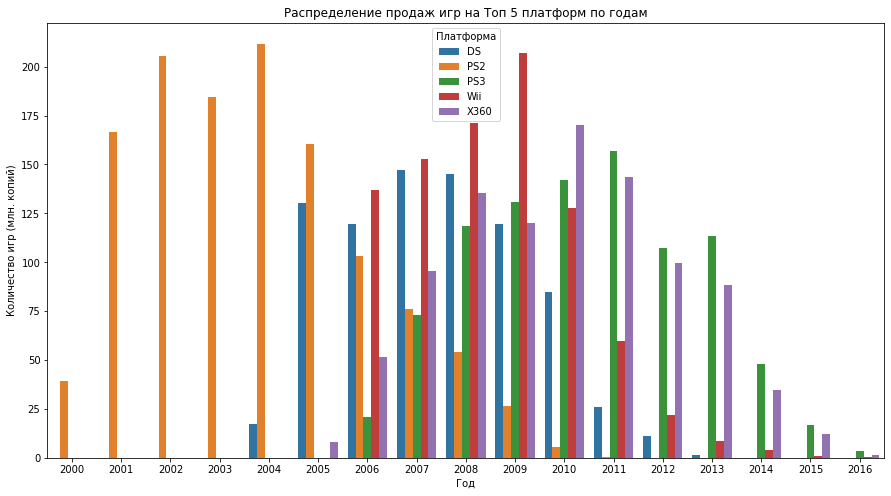

Годы продаж игр на платформе PS2: <IntegerArray>
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
Length: 12, dtype: Int64. Итого: 12 лет
Годы продаж игр на платформе X360: <IntegerArray>
[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Length: 12, dtype: Int64. Итого: 12 лет
Годы продаж игр на платформе PS3: <IntegerArray>
[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Length: 11, dtype: Int64. Итого: 11 лет
Годы продаж игр на платформе Wii: <IntegerArray>
[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Length: 11, dtype: Int64. Итого: 11 лет
Годы продаж игр на платформе DS: <IntegerArray>
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
Length: 10, dtype: Int64. Итого: 10 лет


In [51]:
# Создаем график для визуализации

plt.figure(figsize=(15, 8))
sns.barplot(data=top_sales_by_year, x='year_of_release', y='total_sales', hue='platform')
plt.title('Распределение продаж игр на Топ 5 платформ по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр (млн. копий)')
plt.legend(title='Платформа')
plt.show()

# Сохраняем список годов, в которые продавались игры на разных платфомах

ps2_years = top_sales_by_year[top_sales_by_year['platform'] == 'PS2']['year_of_release'].unique()
x360_years = top_sales_by_year[top_sales_by_year['platform'] == 'X360']['year_of_release'].unique()
ps3_years = top_sales_by_year[top_sales_by_year['platform'] == 'PS3']['year_of_release'].unique()
wii_years = top_sales_by_year[top_sales_by_year['platform'] == 'Wii']['year_of_release'].unique()
ds_years = top_sales_by_year[top_sales_by_year['platform'] == 'DS']['year_of_release'].unique()


print(f'Годы продаж игр на платформе PS2: {ps2_years}. Итого: {len(ps2_years)} лет')
print(f'Годы продаж игр на платформе X360: {x360_years}. Итого: {len(x360_years)} лет')
print(f'Годы продаж игр на платформе PS3: {ps3_years}. Итого: {len(ps3_years)} лет')
print(f'Годы продаж игр на платформе Wii: {wii_years}. Итого: {len(wii_years)} лет')
print(f'Годы продаж игр на платформе DS: {ds_years}. Итого: {len(ds_years)} лет')



**Комментарии**

Для анализа распределения продаж игр по годам мы рассматривали Топ 5 платформ по с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS. Для этих платформ игры выходили в период с 2000 по 2016 год. У нас есть значение 1985 года для платформы DS, но эта игровая консоль вышла только в 2004, значит это ошибка в данных (аномалия). В связи с этим, мы удаляем эту строку из датафрейма. Согласно графику распределения так называемый "период жизни" платформ составляет 10-12 лет, новые платформы появлялись каждые 3-5 лет. 


### Определение актуального периода.

Актуальным периодом называют временной промежуток, который важен для построения модели прогнозирования, так как данные за этот период содержат наиболее релевантную информацию для будущих предсказаний. Выбор периода зависит от того, насколько старые данные сохраняют свою значимость и способность влиять на будущие события. Учитывая стремительные изменения в игровом рынке, разумно исключить устаревшие данные, чтобы сосредоточиться на современном периоде. Основываясь на результатах анализа продажи игр по платформам и выпуска игр по годам, мы можем принять выбор актуального периода с 2013 по 2016 год включительно, так как именно в этот период рынок начал стабилизироваться и демонстрировать тенденции, актуальные и для последующих лет. Эти данные помогут построить адекватный прогноз на 2017 год, основываясь на текущих рыночных реалиях и недавно проявившихся закономерностях в тот период.

In [52]:
# Сохраним в новую переменную только данные за актуальный период

relevant_data = data_games[(data_games['year_of_release'] >= 2013) \
                           & (data_games['year_of_release'] <= 2016)]

# Проверим результат

relevant_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01


### Определение потенциально прибыльных платформ.


Чтобы определить, какие игровые платформы лидируют по продажам и имеют потенциал для роста, необходимо провести подробный анализ  данных о продажах за актуальный период с 2013 по 2016 год. 

In [53]:
# Агрегируем данные по продажам на разных платформах за актуальный период

relevant_data.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: all_sales, dtype: float64

In [54]:
# Сводная таблица по продажам на разных платформах за актуальный период

pivot_relevant_data = relevant_data.pivot_table(
    index='year_of_release',
    columns='platform', 
    values='all_sales',
    aggfunc='sum'
)

# Проверим результат

pivot_relevant_data

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [55]:
# Выведем количество пропущенных значений для каждого столбца

print('Пропущенные значения в "pivot_relevant_data"')
pivot_relevant_data.isna().sum()

Пропущенные значения в "pivot_relevant_data"


platform
3DS     0
DS      3
PC      0
PS3     0
PS4     0
PSP     1
PSV     0
Wii     0
WiiU    0
X360    0
XOne    0
dtype: int64

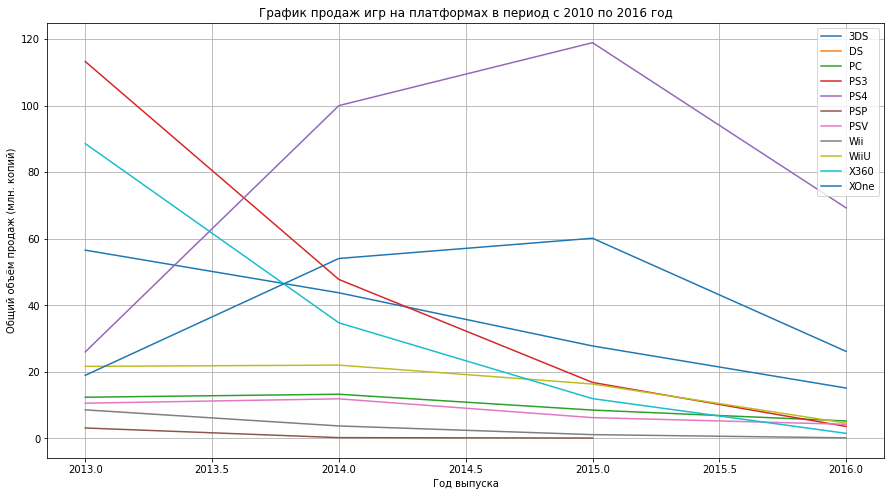

In [57]:
# Построим график продаж игр на платформах в актуальный период

pivot_relevant_data.plot(kind='line', figsize=(15, 8))
plt.title('График продаж игр на платформах в период с 2010 по 2016 год')
plt.xlabel('Год выпуска')
plt.ylabel('Общий объём продаж (млн. копий)')
plt.grid()
plt.legend(loc='best')  # Расположение легенды в наилучшем месте
plt.show()


**Комментарии**

Проанализировав продажи за актуальный период с 2013 по 2016 год можно сделать следующие выводы:
1. Лидерами по общему объему продаж игр являются платформы PS4 (314.14 млн. копий), PS3 (181.43 млн. копий) и XOne (159.32 млн. копий).
2. Продажи на платформах X360, PS3, 3DS стремительно упали в период с 2013 по 2016 год.
3. Продажи на платформах PS4 и XOne, наоборот, выросли в этот период.
4. Продажи на платформах PC, WiiU, PSV, PSP сохраняют примерно одинаковый уровень продаж с небольшими колебаниями. 

Таким образом, в качестве потенциально прибыльных платформ можно выбрать PlayStation 4 (PS4) и Xbox One (XOne) из-за роста продаж, и персональный компьютер (PC) из-за постоянного спроса благодаря доступности стабильного уровня продаж. Эти платформы демонстрируют устойчивость и привлекательность для покупателей. Они хорошо вписываются в современные тенденции гейм-индустрии и предлагают возможность масштабирования бизнеса.


### Глобальные продажам игр в разбивке по платформам.


В предыдущих этапах анализа мы определили актуальный период для прогноза с 2013 по 2016 год, изучим глобальные продажи на этих данных. 

In [58]:
# Посмотрим основные показатели по актуальному периоду для всех данных 

relevant_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,2233.0,2233.000000,2233.000000,2233.000000,2233.000000,991.000000,1192.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,72.023209,6.584564,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,12.841318,1.610413,1.235226
min,2013.0,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2014.0,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2014.0,0.020000,0.030000,0.010000,0.010000,74.000000,7.000000,0.110000
75%,2015.0,0.150000,0.130000,0.050000,0.040000,81.000000,7.800000,0.400000
max,2016.0,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


**Комментарии**

В столбце `all_sales` очень большой размах данных (от 0.48 до 21.05). В таком случае визуализация графика будет неинформативна. В связи с этим, при построении графиков мы введем дополнительную переменную `max_sales_limit` — максимальное значение для ограничения области отображения. Определим ее как 2, так как 75% данных находятся в пределах 0.4, а стандартное отклонение 1.23.

In [59]:
# Посмотрим основные показатели по актуальному периоду для всех платформ 

pivot_relevant_data.describe()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,4.000000,1.00,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,35.812500,1.54,9.857500,45.357500,78.535000,1.166667,8.247500,3.415000,16.157500,34.200000,39.830000
std,18.128338,NaN,3.701102,48.898675,40.567917,1.710010,3.596205,3.765355,8.129507,38.816131,20.313977
min,15.140000,1.54,5.250000,3.600000,25.990000,0.120000,4.250000,0.180000,4.600000,1.520000,18.960000
25%,24.620000,1.54,7.702500,13.515000,58.435000,0.180000,5.750000,0.900000,13.412500,9.350000,24.352500
50%,35.770000,1.54,10.450000,32.290000,84.625000,0.240000,8.420000,2.445000,19.000000,23.350000,40.110000
75%,46.962500,1.54,12.605000,64.132500,104.725000,1.690000,10.917500,4.960000,21.745000,48.200000,55.587500
max,56.570000,1.54,13.280000,113.250000,118.900000,3.140000,11.900000,8.590000,22.030000,88.580000,60.140000


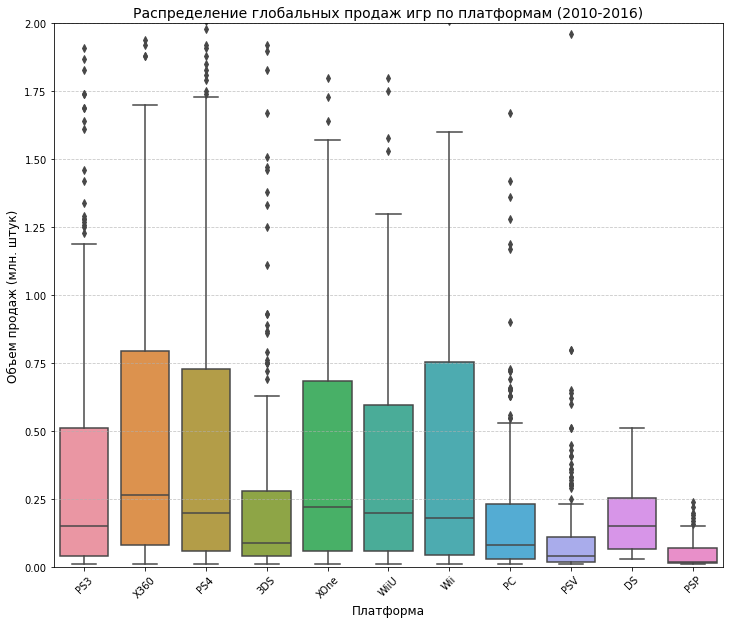

In [60]:
# Рисуем график "ящик с усами"

plt.figure(figsize=(12, 10))
sns.boxplot(x='platform', y='all_sales', data=relevant_data)
plt.title('Распределение глобальных продаж игр по платформам (2010-2016)', fontsize=14)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Объем продаж (млн. штук)', fontsize=12)
max_sales_limit = 2
plt.ylim(bottom=0, top=max_sales_limit)  
plt.xticks(rotation=45)  # Наклон надписей для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Комментарии**

Анализ глобальных продаж игр на различных платформах в актуальный период с 2010 по 2016 год показал, что данные о суммарных продажах имеют очень большой размах данных (от 0.48 до 21.05). При этом в данный период у нас представлены только 12 платформ из 31 (PS3, X360, PS4, 3DS, Wii, XOne, DS, PC, WiiU, PSP, PSV, PS2). Три четверти всех данных (75%) находятся в пределах от 0 до 0.4 млн. проданных копий. Продажи на пяти платформах (X360, PS3, PS4, XOne, WiiU, Wii) показывают наибольший межквартильный размах и медианные значения. Самые большие максимальные значения продаж у четырех платформ: X360, PS3, PS4 и XOne. 

### Корреляция между отзывами и продажами на платформе PS3. 

С целью изучения влияния на продажи отзывов пользователей и критиков мы рассмотрим платформу PlayStation 3 (PS3) как одну из самых популярных, как в актуальный период, так и за весь период в целом. 

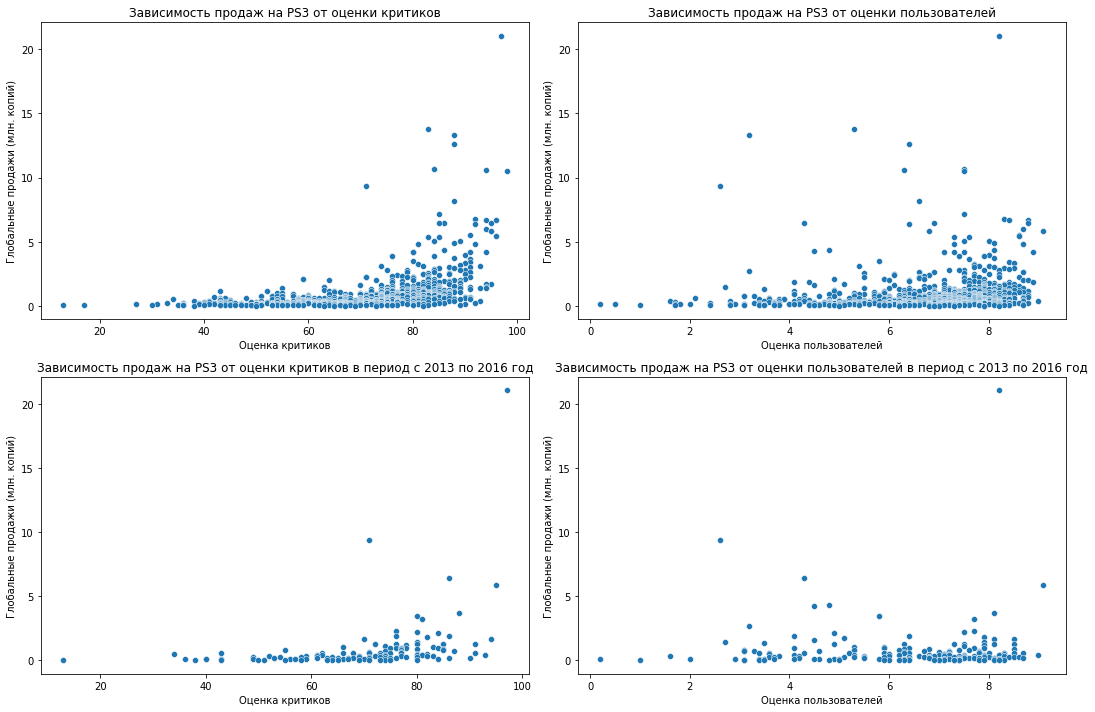

Корреляция между отзывами критиков и продажами: 0.43
Корреляция между отзывами критиков и продажами в период с 2013 по 2016 год: 0.33

Корреляция между отзывами пользователей и продажами: 0.13
Корреляция между отзывами пользователей и продажами в период с 2013 по 2016 год: 0.00


In [61]:
# Выделим игры на платформе PS3
ps3_data = data_games.query("platform == 'PS3'")
ps3_data_relevant = relevant_data.query("platform == 'PS3'")

# Диаграммы рассеяния
plt.figure(figsize=(15, 10))

# Зависимость продаж от оценки критиков
plt.subplot(2, 2, 1)
sns.scatterplot(x='critic_score', y='all_sales', data=ps3_data)
plt.title('Зависимость продаж на PS3 от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн. копий)')

# Зависимость продаж от оценки пользователей 
plt.subplot(2, 2, 2)
sns.scatterplot(x='user_score', y='all_sales', data=ps3_data)
plt.title('Зависимость продаж на PS3 от оценки пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн. копий)')

# Зависимость продаж от оценки критиков в актуальный период
plt.subplot(2, 2, 3)
sns.scatterplot(x='critic_score', y='all_sales', data=ps3_data_relevant)
plt.title('Зависимость продаж на PS3 от оценки критиков в период с 2013 по 2016 год')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн. копий)')

# Зависимость продаж от оценки пользователей в актуальный период
plt.subplot(2, 2, 4)
sns.scatterplot(x='user_score', y='all_sales', data=ps3_data_relevant)
plt.title('Зависимость продаж на PS3 от оценки пользователей в период с 2013 по 2016 год')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн. копий)')

plt.tight_layout()
plt.show()

# Посчитаем корреляционные коэффициенты
correlation_critics_ps3 = ps3_data['critic_score'].corr(ps3_data['all_sales'])
correlation_users_ps3 = ps3_data['user_score'].corr(ps3_data['all_sales'])
correlation_critics_ps3_relevant = ps3_data_relevant['critic_score'].corr(ps3_data_relevant['all_sales'])
correlation_users_ps3_relevant = ps3_data_relevant['user_score'].corr(ps3_data_relevant['all_sales'])

print(f"Корреляция между отзывами критиков и продажами: {correlation_critics_ps3:.2f}")
print(f"Корреляция между отзывами критиков и продажами в период с 2013 по 2016 год: {correlation_critics_ps3_relevant:.2f}")
print()
print(f"Корреляция между отзывами пользователей и продажами: {correlation_users_ps3:.2f}")
print(f"Корреляция между отзывами пользователей и продажами в период с 2013 по 2016 год: {correlation_users_ps3_relevant:.2f}")


**Комментарии** 

При анализе влияния отзывов пользователей и критиков на продажи внутри платформы PlayStation 3 (PS3) мы сделали следующие выводы: 
- Корреляция между отзывами критиков и продажами: 0.43. Значение коэффициента 0.43 говорит о слабом уровне прямой связи между отзывом критиков и уровнем продаж. Это значит, что в среднем игры с высокими оценками критиков склонны продаваться лучше, чем игры с низкими оценками, но эта связь не настолько сильна, чтобы однозначно утверждать о непосредственной зависимости. Наличие положительных отзывов от критиков повышает вероятность успеха игры на рынке, но далеко не гарантирует высоких продаж.
- Корреляция между отзывами пользователей и продажами: 0.13. Значение коэффициента 0.13 говорит об очень слабой связи между мнениями пользователей и покупательной активностью. Пользователи склонны оценивать игры субъективно, что уменьшает предсказательную силу их отзывов относительно реальных объемов продаж.
- Значение корреляции между отзывами и продажами в актуальный период (с 2013 по 2016 год) немного снизилось для отзывов критиков (0.43 → 0.33). Для отзывов пользователей в актуальный период корреляция отсутствует (0.27 → 0) к. Это значит, что влияние отзывов на количество продаж игр снижается со временем.

Таким образом, отзывы критиков играют заметную роль в формировании спроса на игру внутри платформы PlayStation 3, так как позитивные рецензии способствуют увеличению продаж. Мнения пользователей оказываются менее важными для объёма продаж, возможно, пользователи руководствуются иными факторами (реклама, бренд, жанр игры и др.). Тем не менее, оба показателя подтверждают положительное влияние хороших отзывов на продажи, хотя и с разной степенью интенсивности. Разработчикам стоит уделять особое внимание отзывам критиков, так как они заметно влияют на принятие покупателями решений о покупке.

### Корреляция между отзывами и продажами на других платформах.


Для анализа корреляции между отзывами и продажами на других платформах мы остановимся на Топ-5 потенциально прибыльных платформ из актуального периода, основываясь на данных по объему продаж. Этими платформами стали PS4, XOne, PC, WiiU и 3DS.

In [62]:
# Выделим игры на потенциальных платформах

top_platform_relevant = ['PS4', 'XOne', 'PC', 'WiiU', '3DS']

top_data = data_games.query("platform.isin(@top_platform_relevant)")
top_data_relevant = relevant_data.query("platform.isin(@top_platform_relevant)")  


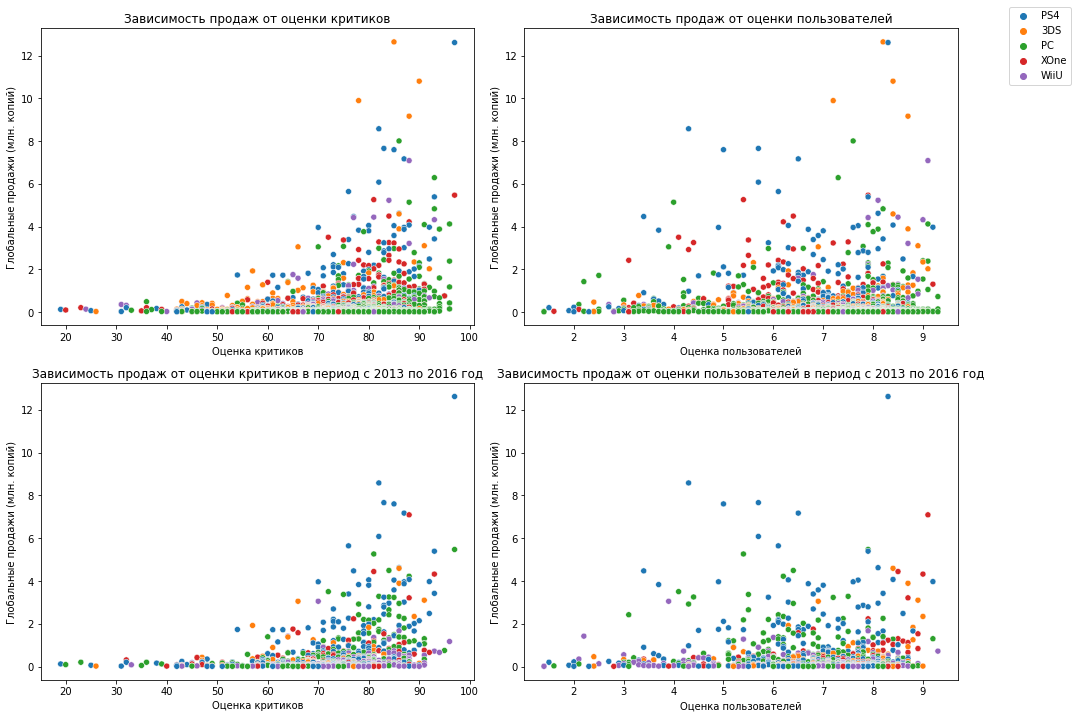

Корреляция между отзывами критиков и продажами: 0.26
Корреляция между отзывами критиков и продажами в период с 2013 по 2016 год: 0.33

Корреляция между отзывами пользователей и продажами: 0.03
Корреляция между отзывами пользователей и продажами в период с 2013 по 2016 год: 0.04


In [63]:
# Построим график зависимости продаж от оценки критиков для всех платформ

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

#plt.figure(figsize=(15, 10))

# Зависимость продаж от оценки критиков
#plt.subplot(2, 2, 1)
sns.scatterplot(x='critic_score', y='all_sales', hue='platform', data=top_data, ax=axes[0, 0])
axes[0, 0].set_title('Зависимость продаж от оценки критиков')
axes[0, 0].set_xlabel('Оценка критиков')
axes[0, 0].set_ylabel('Глобальные продажи (млн. копий)')

# Зависимость продаж от оценки пользователей 
#plt.subplot(2, 2, 2)
sns.scatterplot(x='user_score', y='all_sales', hue='platform', data=top_data, ax=axes[0, 1])
axes[0, 1].set_title('Зависимость продаж от оценки пользователей')
axes[0, 1].set_xlabel('Оценка пользователей')
axes[0, 1].set_ylabel('Глобальные продажи (млн. копий)')

# Зависимость продаж от оценки критиков в актуальный период
#plt.subplot(2, 2, 3)
sns.scatterplot(x='critic_score', y='all_sales', hue='platform', data=top_data_relevant, ax=axes[1, 0])
axes[1, 0].set_title('Зависимость продаж от оценки критиков в период с 2013 по 2016 год')
axes[1, 0].set_xlabel('Оценка критиков')
axes[1, 0].set_ylabel('Глобальные продажи (млн. копий)')

# Зависимость продаж от оценки пользователей в актуальный период
#plt.subplot(2, 2, 4)
sns.scatterplot(x='user_score', y='all_sales', hue='platform', data=top_data_relevant, ax=axes[1, 1])
axes[1, 1].set_title('Зависимость продаж от оценки пользователей в период с 2013 по 2016 год')
axes[1, 1].set_xlabel('Оценка пользователей')
axes[1, 1].set_ylabel('Глобальные продажи (млн. копий)')


# Объединяем лейблы для всех графиков
handles, labels = axes[0, 0].get_legend_handles_labels()

# Создаем общую легенду
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1, 1))
plt.legend(loc='best')

# Скрываем лишние легенды на панелях
for row in range(len(axes)):
    for col in range(len(axes[0])):
        axes[row, col].get_legend().remove()

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Корректируем пространство для легенды
plt.show()

# Посчитаем корреляционные коэффициенты
correlation_critics = top_data['critic_score'].corr(top_data['all_sales'])
correlation_users = top_data['user_score'].corr(top_data['all_sales'])
correlation_critics_relevant = top_data_relevant['critic_score'].corr(top_data_relevant['all_sales'])
correlation_users_relevant = top_data_relevant['user_score'].corr(top_data_relevant['all_sales'])

print(f"Корреляция между отзывами критиков и продажами: {correlation_critics:.2f}")
print(f"Корреляция между отзывами критиков и продажами в период с 2013 по 2016 год: {correlation_critics_relevant:.2f}")
print()
print(f"Корреляция между отзывами пользователей и продажами: {correlation_users:.2f}")
print(f"Корреляция между отзывами пользователей и продажами в период с 2013 по 2016 год: {correlation_users_relevant:.2f}")



**Комментарии**

Корреляция между отзывами критиков и продажами на платформе PlayStation 3 и на остальных платформах имеет значительные различия:
- На платформе PS3 наблюдается слабая положительная корреляция (0.43), что подтверждает незначительную важность мнения критиков для успешных продаж на этой платформе за весь период, но в актуальный период (2013–2016) корреляция еще немного снизилась (до 0.33), что может говорить о снижении роли критики в последние годы.
- Среди потенциальных платформ корреляция тоже слабая, но показывает обратную тенденцию к увеличению влияния (0.26 → 0.33), что отражает большую вариабельность реакции рынка на критику в зависимости от платформы.
- Связь между отзывами пользователей и продажами намного слабее или практически отсутствует (0.13 → 0.0 на PS3 и 0.03 → 0.04 на потенциальных платформах).

Таким образом, критики оказывают большее влияние на продажи игр, особенно на PS3. Пользователям гораздо меньше доверяют покупатели, их оценки слабо ассоциируются с успешностью продаж. Тенденция снижения важности мнений критиков и безразличие к мнению пользователей в актуальный период подтверждается небольшим ростом корреляции с 2013 по 2016 год.

### Распределение игр по жанрам. 

In [64]:
# Посмотрим все уникальные значения жанров в датафрейме

print('Количество жанров:', len(data_games['genre'].unique()))
print('Жанры:', ", ".join(data_games['genre'].unique().astype(str)))

Количество жанров: 12
Жанры: Sports, Platform, Racing, Role-Playing, Puzzle, Misc, Shooter, Simulation, Action, Fighting, Adventure, Strategy


In [68]:
# Сводная таблица продаж игр по платформам за актуальный период

pivot_genre_relevant = relevant_data.pivot_table(
    index='genre',
    values='all_sales',
    aggfunc=['sum','median']
).reset_index()

# Переименовываем столбцы

pivot_genre_relevant.columns = ["genre", "all_sales", "median"]

# Отсортируем данные по сумме продаж по убыванию 

pivot_genre_relevant = pivot_genre_relevant.sort_values(by='median', ascending=False)
pivot_genre_relevant

,genre,all_sales,median
8,Shooter,232.98,0.450
10,Sports,150.65,0.240
4,Platform,42.63,0.225
7,Role-Playing,145.89,0.125
2,Fighting,35.31,0.125
6,Racing,39.89,0.120
0,Action,321.87,0.110
9,Simulation,21.76,0.100
3,Misc,62.82,0.100
11,Strategy,10.08,0.080


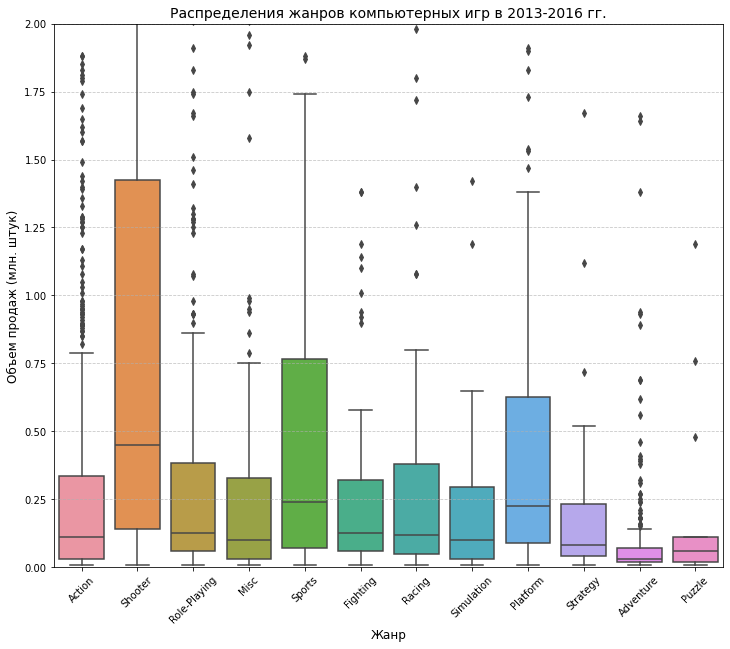

In [69]:
# Рисуем график "ящик с усами" за актуальный период

plt.figure(figsize=(12, 10))
sns.boxplot(x='genre', y='all_sales', data=relevant_data)
plt.title('Распределения жанров компьютерных игр в 2013-2016 гг.', fontsize=14)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Объем продаж (млн. штук)', fontsize=12)
max_sales_limit = 2
plt.ylim(bottom=0, top=max_sales_limit)  
plt.xticks(rotation=45)  # Наклон надписей для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Комментарии**

При рассмотрении общего распределения игр по жанрам можно выделить 12 различных жанров компьютерных игр: Action, Sports, Shooter, Role-Playing, Platform, Misc, Racing, Fighting, Simulation, Puzzle, Adventure, Strategy. В актуальный период при анализе медианных показателей продаж игр, самыми популярными жанрами с высокими продажами являются Shooter, Sports и Platform. Самые низкие продажи у игр в жанре Puzzle, Strategy и Adventure. 

**Выводы**

По результата исследовательского анализа данных в датафрейме можно сделать следующие выводы:
1. Данные о продаже игр представлены с 1980 по 2016 год. Однако до 1995 года выпускалось минимальное количество компьютерных игр, что объясняется историческим фактором. Один из первых пиков в количестве выпуска игр приходится на 1998 год. Разработка компьютерной игры довольно трудоемкий и длительный по времени процесс, это может объяснить неравномерное распределения количества игр по годам. Прослеживается паттерн, что после пикового значения по количеству выпущенных игр следует резкий спад на несколько лет.
2. Всего в датафрейме представлены 31 разная платформа. Топ-5 платформ по с наибольшими суммарными продажами за весь период времени: PlayStation 2, Xbox 360, PlayStation 3, Nintendo Wii, Nintendo DS. Для этих платформ игры выходили в период с 2000 по 2016 год. Согласно графику распределения так называемый "период жизни" платформ составляет 10-12 лет, новые платформы появлялись каждые 3-5 лет.
3. Основываясь на результатах анализа продажи игр по платформам и выпуска игр по годам, мы определили актуальный период с 2013 по 2016 год включительно, так как именно в этот период рынок начал стабилизироваться и демонстрировать тенденции, актуальные и для последующих лет. Эти данные помогут построить адекватный прогноз на 2017 год, основываясь на текущих рыночных реалиях и недавно проявившихся закономерностях в тот период.
4. Проанализировав продажи за актуальный период с 2013 по 2016 год мы определили, что в качестве потенциально прибыльных платформ можно выбрать PlayStation 4 (PS4) и Xbox One (XOne) из-за роста продаж, и персональный компьютер (PC) из-за постоянного спроса благодаря доступности стабильного уровня продаж. Эти платформы демонстрируют устойчивость и привлекательность для покупателей. 
5. Корреляция между отзывами критиков и продажами на платформе PlayStation 3 и на остальных платформах имеет значительные различия. Критики оказывают большее влияние на продажи игр, особенно на PS3. Пользователям гораздо меньше доверяют покупатели, их оценки слабо ассоциируются с успешностью продаж. Тенденция снижения важности мнений критиков и безразличие к мнению пользователей в актуальный период подтверждается небольшим ростом корреляции с 2013 по 2016 год.
6. При рассмотрении общего распределения игр по жанрам можно выделить 12 различных жанров компьютерных игр: Action, Sports, Shooter, Role-Playing, Platform, Misc, Racing, Fighting, Simulation, Puzzle, Adventure, Strategy. В актуальный период при анализе медианных показателей продаж игр, самыми популярными жанрами с высокими продажами являются Shooter, Sports и Platform. Самые низкие продажи у игр в жанре Puzzle, Strategy и Adventure.

## Составление портрета пользователя каждого региона


### Самые популярные платформы (Топ-5).

Напомним, что всего в датафрейме представлена 31 разная платформа. В Топ-5 глобальных платформ по с наибольшими суммарными продажами за весь период вошли PlayStation 2, Xbox 360, PlayStation 3, Nintendo Wii и Nintendo DS. Далее в этом разделе рассмотрим как приоритет платформ менялся в зависимости от региона пользователей.


#### Самые популярные платформы в Северной Америке (NA).

In [71]:
# Создаем сводную таблицу по платформам для региона Северной Америки за актуальный период (2013-2016)

pivot_table_na_platform_relevant = relevant_data.pivot_table(
    index='platform',
    values='na_sales',
    aggfunc='sum'
)

# Проверим результат и отсортируем таблицу по убыванию

pivot_table_na_platform_relevant = pivot_table_na_platform_relevant.sort_values(by='na_sales', ascending=False).reset_index()
pivot_table_na_platform_relevant.head(5)

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


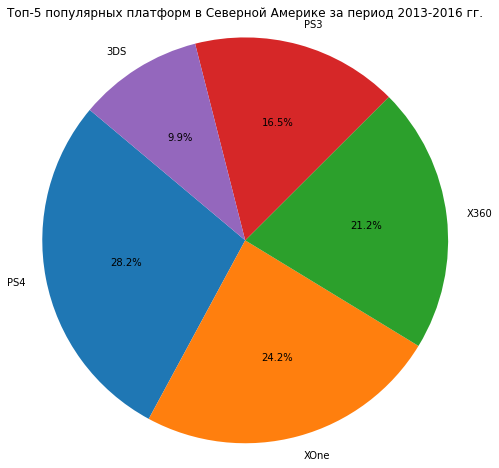

Топ-5 популярных платформ в Северной Америке за период 2013-2016 гг.: 


,Платформа,Объем продаж в Северной Америке,Проценты
0,PS4,108.74,28.23
1,XOne,93.12,24.17
2,X360,81.66,21.20
3,PS3,63.50,16.48
4,3DS,38.20,9.92


In [72]:
# Отбираем Топ-5 платформ по объемам продаж для региона Северной Америки за актуальный период

top_na_platform_relevant = pivot_table_na_platform_relevant.nlargest(5, 'na_sales')

# Данные для круговой диаграммы

labels = top_na_platform_relevant['platform'].values
sizes = top_na_platform_relevant['na_sales'].values

# Рисуем круговую диаграмму оотношения пользователей с подпиской и без подписки.

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Круг должен быть правильным, а не эллипсом
plt.title("Топ-5 популярных платформ в Северной Америке за период 2013-2016 гг.")
plt.show()


# Добавляем колонку с процентами
platform_sum = top_na_platform_relevant['na_sales'].sum()
top_na_platform_relevant['Проценты'] = round((top_na_platform_relevant['na_sales'] / platform_sum) * 100, 2)

 
# Переименование столбцов 

#top_na_platform.rename(columns={'platform': 'Платформа', 'na_sales': 'Объем продаж в Северной Америке'}, inplace=True)
top_na_platform_relevant.rename(columns={'platform': 'Платформа', 'na_sales': 'Объем продаж в Северной Америке'}, inplace=True)

# Выводим результат

# print("Топ-5 популярных платформ в Северной Америке за весь период времени: ")
# display(top_na_platform.drop(columns='period'))
# print()
print("Топ-5 популярных платформ в Северной Америке за период 2013-2016 гг.: ")
display(top_na_platform_relevant)



**Комментарии**

Анализируя Топ-5 популярных платформ в Северной Америке за весь период времени и за актуальный период (2013-2016 гг.) Можно сделать следующие выводы:
- Постоянное лидерство Xbox 360: Консоль Xbox 360 остается лидером продаж как за весь период, так в актуальный период (2013–2016), показывая сильную позицию на североамериканском рынке.
- Стабильная популярность Sony PlayStation: Несмотря на уход PlayStation 2 (PS2), следующая консоль Sony PlayStation 3 (PS3) занимает второе место за период 2010–2016 гг., уступая лишь Xbox 360. Кроме того, PlayStation 4 (PS4) дебютировала на первое место в топ-5 за короткий срок, подтвердив конкурентоспособность бренда.
- Появление новых платформ: Консоли последнего поколения, такие как PS4 и Xbox One, вошли в Топ-5 в актуальный период, доказав свою востребованность и быстрое завоевание рынка.
- Исключение Nintendo DS: Портативная приставка DS и консоль Wii, популярные в общем периоде, исчезли из рейтинга последних лет, но в рейтинг вошла новинка 3DS.
Несмотря на перемены, лидирующие позиции занимают консоли Xbox и PlayStation, подчеркивая доминирование этих брендов на рынке США. 



#### Самые популярные платформы в Европе (EU).

In [73]:
# Создаем сводную таблицу по платформам для региона Европы за весь период времени

pivot_table_eu_platform = data_games.pivot_table(
    index='platform',
    values='eu_sales',
    aggfunc='sum'
)

# Проверим результат и отсортируем таблицу по убыванию

pivot_table_eu_platform = pivot_table_eu_platform.sort_values(by='eu_sales', ascending=False).reset_index()
pivot_table_eu_platform.head(5)

,platform,eu_sales
0,PS2,332.63
1,PS3,327.20
2,X360,268.32
3,Wii,258.32
4,PS,212.39


In [74]:
# Создаем сводную таблицу по платформам для региона Европы за актуальный период (2010-2016)

pivot_table_eu_platform_relevant = relevant_data.pivot_table(
    index='platform',
    values='eu_sales',
    aggfunc='sum'
)

# Проверим результат и отсортируем таблицу по убыванию

pivot_table_eu_platform_relevant = pivot_table_eu_platform_relevant.sort_values(by='eu_sales', ascending=False).reset_index()
pivot_table_eu_platform_relevant.head(5)

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


In [75]:
# Отбираем Топ-5 платформ по объемам продаж для региона Европы за весь период времени

top_eu_platform = pivot_table_eu_platform.nlargest(5, 'eu_sales')

# Отбираем Топ-5 платформ по объемам продаж для региона Европы за актуальный период

top_eu_platform_relevant = pivot_table_eu_platform_relevant.nlargest(5, 'eu_sales')

# Переименование столбцов 

top_eu_platform.rename(columns={'platform': 'Платформа', 'eu_sales': 'Объем продаж в Европе'}, inplace=True)
top_eu_platform_relevant.rename(columns={'platform': 'Платформа', 'eu_sales': 'Объем продаж в Европе'}, inplace=True)

# Выводим результат

print("Топ-5 популярных платформ в Европе за весь период времени: ")
display(top_eu_platform)
print()
print("Топ-5 популярных платформ в Европе за период 2013-2016 гг.: ")
display(top_eu_platform_relevant)

Топ-5 популярных платформ в Европе за весь период времени: 


,Платформа,Объем продаж в Европе
0,PS2,332.63
1,PS3,327.20
2,X360,268.32
3,Wii,258.32
4,PS,212.39



Топ-5 популярных платформ в Европе за период 2013-2016 гг.: 


,Платформа,Объем продаж в Европе
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


**Комментарии**

Анализируя Топ-5 популярных платформ в Европе за весь период времени и за актуальный период (2013-2016 гг.) Можно сделать следующие выводы:
- Доминирование Sony: Бренд Sony остаётся популярным и конкурентным на европейском рынке. PlayStation 2 (PS2) и PlayStation 3 (PS3) удерживали лидирующие позиции за весь период, причем PlayStation 3 сохранила первое место и в актуальный период (2013–2016 гг.). При этом PlayStation 4 (PS4) уверенно заняла первое место среди лидеров за последние годы, несмотря на непродолжительность своего присутствия на рынке. А на пятой позиции в рейтинге за весь период также присутствовала консоль первого поколения PlayStation (PS).
- Хорошие позиции Microsoft: Xbox 360 (X360) вошел в топ-5 обоих рейтингов, в рейтинг в актуальном периоде также вошла Xbox One (XOne), показывая хороший результат в конкуренции с Sony.
- Упадок Wii: Популярность Nintendo Wii серьёзно упала за последние годы, уйдя с четвёртого места за весь период в актуальном периоде. Ее заменила новая платформа 3DS.

Европейский рынок отличается сильной конкуренцией между Sony и Microsoft, причём обе компании сменяют друг друга на вершине.


#### Самые популярные платформы в Японии (JP).

In [76]:
# Создаем сводную таблицу по платформам для Японии за весь период времени

pivot_table_jp_platform = data_games.pivot_table(
    index='platform',
    values='jp_sales',
    aggfunc='sum'
)

# Проверим результат и отсортируем таблицу по убыванию

pivot_table_jp_platform = pivot_table_jp_platform.sort_values(by='jp_sales', ascending=False).reset_index()
pivot_table_jp_platform.head(5)

,platform,jp_sales
0,DS,175.00
1,PS,139.78
2,PS2,137.54
3,SNES,116.55
4,3DS,100.62


In [77]:
# Создаем сводную таблицу по платформам для Японии за актуальный период (2010-2016)

pivot_table_jp_platform_relevant = relevant_data.pivot_table(
    index='platform',
    values='jp_sales',
    aggfunc='sum'
)

# Проверим результат и отсортируем таблицу по убыванию

pivot_table_jp_platform_relevant = pivot_table_jp_platform_relevant.sort_values(by='jp_sales', ascending=False).reset_index()
pivot_table_jp_platform_relevant.head(5)

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


In [78]:
# Отбираем Топ-5 платформ по объемам продаж для Японии за весь период времени

top_jp_platform = pivot_table_jp_platform.nlargest(5, 'jp_sales')

# Отбираем Топ-5 платформ по объемам продаж для Японии за актуальный период

top_jp_platform_relevant = pivot_table_jp_platform_relevant.nlargest(5, 'jp_sales')

# Переименование столбцов 

top_jp_platform.rename(columns={'platform': 'Платформа', 'jp_sales': 'Объем продаж в Японии'}, inplace=True)
top_jp_platform_relevant.rename(columns={'platform': 'Платформа', 'jp_sales': 'Объем продаж в Японии'}, inplace=True)

# Выводим результат

print("Топ-5 популярных платформ в Японии за весь период времени: ")
display(top_jp_platform)
print()
print("Топ-5 популярных платформ в Японии за период 2013-2016 гг.: ")
display(top_jp_platform_relevant)

Топ-5 популярных платформ в Японии за весь период времени: 


,Платформа,Объем продаж в Японии
0,DS,175.00
1,PS,139.78
2,PS2,137.54
3,SNES,116.55
4,3DS,100.62



Топ-5 популярных платформ в Японии за период 2013-2016 гг.: 


,Платформа,Объем продаж в Японии
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


**Комментарии**

Анализируя Топ-5 популярных платформ в Японии за весь период времени и за актуальный период (2013-2016 гг.) Можно сделать следующие выводы:
- Популярность Nintendo: портативные консоли Nintendo остаются популярными в Японии. Nintendo DS (DS) возглавлял список за весь период, а Nintendo 3DS (3DS) стал первым в период 2013–2016 гг., продемонстрировав преемственность популярности. Также в рейтинге присутствует Super Nintendo (SNES), и хотя она была популярна в прошлом, она выпала из актуального топа, показывая смену потребительских предпочтений, ее заменила Nintendo WiiU (WiiU).
- Закрепление позиций Sony: Sony PlayStation 3 (PS3) заняла второе место за последние годы, сохраняя своё присутствие на японском рынке, несмотря на сильное давление со стороны конкурентов. Кроме этого в обоих рейтингах присутствуют и другие платформы Sony, такие как PlayStation (PS), PlayStation 2 (PS2) и PlayStation Portable (PSP).  Появившиеяся позже, PlayStation Vita (PSV) и PlayStation 4 (PS4) вошли в топ-5 за последние годы.

Японский рынок традиционно ориентирован на мобильные устройства. Япония предпочитает портативные устройства, будь то продукты Nintendo или линейки PlayStation от Sony. Этот рынок характеризуется традиционными вкусами потребителей, предпочитающих компактные системы для развлечений. Новые поколения приставок постепенно входят в круг фаворитов, укрепляя свои позиции на протяжении коротких сроков.

In [79]:
# Создаем сводную таблицу по платформам для всех регионов за весь период времени 

pivot_region_platform = data_games.pivot_table(
    index='platform',
    values=['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc='sum'
).reset_index()

pivot_region_platform.head(5)

,platform,eu_sales,jp_sales,na_sales
0,2600,4.86,0.00,80.78
1,3DO,0.00,0.10,0.00
2,3DS,61.27,100.62,82.65
3,DC,1.69,8.56,5.43
4,DS,188.41,175.00,380.31


In [80]:
# Добавляем столбец с общими продажами

pivot_region_platform['total_sales'] = pivot_region_platform['eu_sales'] + pivot_region_platform['jp_sales'] \
+ pivot_region_platform['na_sales'] 

# Вычислим долю продаж по платформам для трех регионов

pivot_region_platform['na_sales_pct'] = pivot_region_platform['na_sales'] / pivot_region_platform['total_sales'] * 100
pivot_region_platform['eu_sales_pct'] = pivot_region_platform['eu_sales'] / pivot_region_platform['total_sales'] * 100
pivot_region_platform['jp_sales_pct'] = pivot_region_platform['jp_sales'] / pivot_region_platform['total_sales'] * 100

# Отбрасываем абсолютные значения продаж, оставляя только проценты

pivot_region_platform = pivot_region_platform[
    ['platform', 'na_sales_pct', 'eu_sales_pct', 'jp_sales_pct']
]

# Округляем значения процентов до двух знаков после запятой

pivot_region_platform = pivot_region_platform.round(2)

# Оставляем в таблице только те платформы, которые вошли в Топ-5 в каждом регионе

top_region_platform = ['X360', 'PS2', 'Wii', 'PS3', 'DS', 'PS4', 'XOne', 'PS', 'SNES', '3DS', 'PSP', 'PSV']
pivot_region_platform = pivot_region_platform.query("platform.isin(@top_region_platform)")

# Переименование столбцов 

pivot_region_platform.rename(columns={'platform': 'Платформа', 'jp_sales_pct': 'Доля продаж в Японии',\
                                     'na_sales_pct': 'Доля продаж в Cеверной Америке', \
                                      'eu_sales_pct': 'Доля продаж в Европе'}, inplace=True)

# Проверяем результат

print("Доля продаж в регионах на различных платформах: ")
pivot_region_platform.reset_index(drop=True)

Доля продаж в регионах на различных платформах: 


,Платформа,Доля продаж в Cеверной Америке,Доля продаж в Европе,Доля продаж в Японии
0,3DS,33.80,25.06,41.15
1,DS,51.14,25.33,23.53
2,PS,48.73,30.92,20.35
3,PS2,54.93,31.89,13.19
4,PS3,48.97,41.07,9.97
5,PS4,40.91,53.08,6.00
6,PSP,43.12,26.38,30.50
7,PSV,26.32,27.59,46.10
8,SNES,31.11,9.67,59.22
9,Wii,59.85,31.76,8.39


**Комментарии**

Представленные данные показывают доли продаж по регионам для различных игровых платформ. Рассмотрим главные выводы на основании представленных пропорций: 
- Регион определяет предпочтения: Американская аудитория склонна к продукции Microsoft, европейская — к Sony, а японская — к портативным устройствам Nintendo и Sony.
- Различия в культуре потребления: Европа ценит многофункциональные стационарные консоли, а Япония предпочитает компактные портативные устройства.
- Мировые тенденции: Microsoft и Sony борются за лидерство на мировых рынках, при этом их позиции варьируются в зависимости от культурных особенностей стран.

Таким образом, анализ данных показывает, что региональные рынки отличаются глубокими культурными предпочтениями и привычками пользователей. Американцы любят мощные домашние консоли, европейцы отдают предпочтение разнообразным мультимедийным возможностям, а японцы сохраняют лояльность к портативным платформам. Такое разделение важно учитывать производителям и разработчикам игр при выборе стратегических направлений продвижения и разработки проектов.


### Самые популярные жанры (топ-5). 

#### Самые популярные жанры в Северной Америке (NA).

In [81]:
# Создаем сводную таблицу по жанрам для региона Северной Америки за весь период времени

pivot_table_na_genre = data_games.pivot_table(
    index='genre',
    values='na_sales',
    aggfunc='sum'
)

# Проверим результат и отсортируем таблицу по убыванию

pivot_table_na_genre = pivot_table_na_genre.sort_values(by='na_sales', ascending=False).reset_index()
pivot_table_na_genre.head(5)

,genre,na_sales
0,Action,863.17
1,Sports,671.20
2,Shooter,584.83
3,Platform,444.44
4,Misc,399.57


In [82]:
# Создаем сводную таблицу по жанрам для региона Северной Америки за актуальный период (2010-2016)

pivot_table_na_genre_relevant = relevant_data.pivot_table(
    index='genre',
    values='na_sales',
    aggfunc='sum'
)

# Проверим результат и отсортируем таблицу по убыванию

pivot_table_na_genre_relevant = pivot_table_na_genre_relevant.sort_values(by='na_sales', ascending=False).reset_index()
pivot_table_na_genre_relevant.head(5)

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


In [83]:
# Отбираем Топ-5 жанров по объемам продаж для региона Северной Америки за весь период времени

top_na_genre = pivot_table_na_genre.nlargest(5, 'na_sales')

# Отбираем Топ-5 жанров по объемам продаж для региона Северной Америки за актуальный период

top_na_genre_relevant = pivot_table_na_genre_relevant.nlargest(5, 'na_sales')

# Переименование столбцов 

top_na_genre.rename(columns={'genre': 'Жанр', 'na_sales': 'Объем продаж в Северной Америке'}, inplace=True)
top_na_genre_relevant.rename(columns={'genre': 'Жанр', 'na_sales': 'Объем продаж в Северной Америке'}, inplace=True)

# Выводим результат

print("Топ-5 популярных жанров в Северной Америке за весь период времени: ")
display(top_na_genre)
print()
print("Топ-5 популярных жанров в Северной Америке за период 2013-2016 гг.: ")
display(top_na_genre_relevant)

Топ-5 популярных жанров в Северной Америке за весь период времени: 


,Жанр,Объем продаж в Северной Америке
0,Action,863.17
1,Sports,671.20
2,Shooter,584.83
3,Platform,444.44
4,Misc,399.57



Топ-5 популярных жанров в Северной Америке за период 2013-2016 гг.: 


,Жанр,Объем продаж в Северной Америке
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


**Комментарии**

Анализируя Топ-5 популярных жанров в Северной Америке за весь период времени и за актуальный период (2013-2016 гг.) Можно сделать следующие выводы:
- Жанр Action оставался ведущим как за весь период, так и за последние годы (2013–2016).
- Заметен рост популярности жанра Shooter. Он поднялся на второе место за последние годы, показывая существенное усиление привлекательности для североамериканской аудитории, что может быть связано с развитием киберспортивных дисциплин и высокобюджетных проектов.
- Спортивный жанр потерял позиции, сместившись с первого места на третье, что говорит о смене приоритетов у геймеров и изменении моды на жанровые предпочтения.
- Жанр RPG (Role-Playing) появился в пятерке лучших за последние годы, свидетельствуя о росте интереса к сложноструктурированным сюжетным играм с глубокой ролевой механикой.
- Происходит снижение интереса к платформерам (Platform). Этот жанр сократил свою долю продаж, утратив прежнюю популярность, что отражает уход отрасли от классических платформеров к более продвинутым жанрам.
Американский рынок демонстрирует интересные изменения в жанре игр, отдавая предпочтение активным действиям, стрельбе и интригующим сюжетам. Спортивные игры теряют популярность, уступая дорогу высокотехнологичным боевикам и интересным историям. Североамериканские геймеры открыты к экспериментам с новыми жанрами, такими как RPG (Role-Playing). 

#### Самые популярные жанры в Европе (EU).

In [84]:
# Создаем сводную таблицу по жанрам для региона Европы за весь период времени

pivot_table_eu_genre = data_games.pivot_table(
    index='genre',
    values='eu_sales',
    aggfunc='sum'
)

# Проверим результат и отсортируем таблицу по убыванию

pivot_table_eu_genre = pivot_table_eu_genre.sort_values(by='eu_sales', ascending=False).reset_index()
pivot_table_eu_genre.head(5)

,genre,eu_sales
0,Action,510.99
1,Sports,371.32
2,Shooter,314.52
3,Racing,234.49
4,Misc,210.60


In [85]:
# Создаем сводную таблицу по жанрам для региона Европы за актуальный период (2010-2016)

pivot_table_eu_genre_relevant = relevant_data.pivot_table(
    index='genre',
    values='eu_sales',
    aggfunc='sum'
)

# Проверим результат и отсортируем таблицу по убыванию

pivot_table_eu_genre_relevant = pivot_table_eu_genre_relevant.sort_values(by='eu_sales', ascending=False).reset_index()
pivot_table_eu_genre_relevant.head(5)

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


In [86]:
# Отбираем Топ-5 жанров по объемам продаж для региона Европы за весь период времени

top_eu_genre = pivot_table_eu_genre.nlargest(5, 'eu_sales')

# Отбираем Топ-5 жанров по объемам продаж для региона Европы за актуальный период

top_eu_genre_relevant = pivot_table_eu_genre_relevant.nlargest(5, 'eu_sales')

# Переименование столбцов 

top_eu_genre.rename(columns={'genre': 'Жанр', 'eu_sales': 'Объем продаж в Европе'}, inplace=True)
top_eu_genre_relevant.rename(columns={'genre': 'Жанр', 'eu_sales': 'Объем продаж в Европе'}, inplace=True)

# Выводим результат

print("Топ-5 популярных жанров в Европе за весь период времени: ")
display(top_eu_genre)
print()
print("Топ-5 популярных жанров в Европе за период 2013-2016 гг.: ")
display(top_eu_genre_relevant)

Топ-5 популярных жанров в Европе за весь период времени: 


,Жанр,Объем продаж в Европе
0,Action,510.99
1,Sports,371.32
2,Shooter,314.52
3,Racing,234.49
4,Misc,210.60



Топ-5 популярных жанров в Европе за период 2013-2016 гг.: 


,Жанр,Объем продаж в Европе
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


**Комментарии**

Анализируя Топ-5 популярных жанров в Европе за весь период времени и за актуальный период (2013-2016 гг.) Можно сделать следующие выводы:
- Жанр Action неизменно занимал первое место как за весь период, так и за последние годы (2013–2016), демонстрируя постоянное внимание европейской аудитории к динамичным экшен-проектам.
- Жанр Shooter вышел на второе место в актуальный период, потеснив спортивный жанр. 
- Происходит снижение интереса к спортивным играм, этот жанр упал с второго места на третье, что говорит о некоторой усталости от спортивного сегмента и переходе внимания к более динамичным жанрам.
- Жанр RPG вошел в пятерку лучших в актуальный период, что свидетельствует о возросшей заинтересованности в сложных играх с глубокими сюжетами и возможностями кастомизации персонажей.
- Также в топе присутствует жанр Racing, но он стал наименее популярным среди Топ-5 жанров за оба периода, что может говорить о смещении фокусировки аудитории на конкретные жанры с яркими характеристиками.

Таким образом, европейский рынок демонстрирует схожие с рынком Северной Америки тенденции. Он показал такое же перераспределение жанрового баланса, сохранив популярность активных игр (Action и Shooter), но увеличив интерес к сюжетным и глубоким проектам (Role-Playing). Спортивная категория теряет позиции, уступая место более динамичным направлениям. 

#### Самые популярные жанры в Японии (JP).

In [87]:
# Создаем сводную таблицу по жанрам для Японии за весь период времени

pivot_table_jp_genre = data_games.pivot_table(
    index='genre',
    values='jp_sales',
    aggfunc='sum'
)

# Проверим результат и отсортируем таблицу по убыванию

pivot_table_jp_genre = pivot_table_jp_genre.sort_values(by='jp_sales', ascending=False).reset_index()
pivot_table_jp_genre.head(5)

,genre,jp_sales
0,Role-Playing,353.39
1,Action,160.12
2,Sports,134.93
3,Platform,130.71
4,Misc,107.02


In [88]:
# Создаем сводную таблицу по жанрам для Японии за актуальный период (2010-2016)

pivot_table_jp_genre_relevant = relevant_data.pivot_table(
    index='genre',
    values='jp_sales',
    aggfunc='sum'
)

# Проверим результат и отсортируем таблицу по убыванию

pivot_table_jp_genre_relevant = pivot_table_jp_genre_relevant.sort_values(by='jp_sales', ascending=False).reset_index()
pivot_table_jp_genre_relevant.head(5)

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


In [89]:
# Отбираем Топ-5 жанров по объемам продаж для Японии за весь период времени

top_jp_genre = pivot_table_jp_genre.nlargest(5, 'jp_sales')

# Отбираем Топ-5 жанров по объемам продаж для Японии за актуальный период

top_jp_genre_relevant = pivot_table_jp_genre_relevant.nlargest(5, 'jp_sales')

# Переименование столбцов 

top_jp_genre.rename(columns={'genre': 'Жанр', 'jp_sales': 'Объем продаж в Японии'}, inplace=True)
top_jp_genre_relevant.rename(columns={'genre': 'Жанр', 'jp_sales': 'Объем продаж в Японии'}, inplace=True)

# Выводим результат

print("Топ-5 популярных жанров в Японии за весь период времени: ")
display(top_jp_genre)
print()
print("Топ-5 популярных жанров в Японии за период 2013-2016 гг.: ")
display(top_jp_genre_relevant)

Топ-5 популярных жанров в Японии за весь период времени: 


,Жанр,Объем продаж в Японии
0,Role-Playing,353.39
1,Action,160.12
2,Sports,134.93
3,Platform,130.71
4,Misc,107.02



Топ-5 популярных жанров в Японии за период 2013-2016 гг.: 


,Жанр,Объем продаж в Японии
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


**Комментарии**

Анализируя Топ-5 популярных жанров в Японии  за весь период времени и за актуальный период (2013-2016 гг.) Можно сделать следующие выводы:
- Жанр RPG (Role-Playing) остался на первом месте как за весь период, так и за последние годы (2013–2016), подчеркивая глубокое уважение японских геймеров к этому жанру. Большое количество японских разработчиков специализируется на RPG-проектах, что объясняет их долговечность и успех.
- Хотя Action уступил место лидера, он занимает уверенное второе место в обоих рейтингах, демонстрируя интерес японских игроков к активным играм.
- Жанр Sports значительно потерял позиции, опустившись с третьего места на весь период до отсутствия в актуальной пятерке, что может свидетельствовать о снижении интереса к спортивным играм в условиях жесткой конкуренции.
- Игровой жанр Platform, бывший четвёртым в общем рейтинге, также перестал входить в топ-5 популярных жанров.
- Появились совершенно новые категории в топе — Fighting и Shooter, отражающие современные игровые предпочтения аудитории.

Японский рынок выделяет особую роль RPG, оставаясь основным направлением для местных разработчиков и игроков. Вместе с тем наблюдаются признаки обновления предпочтений, сопровождающиеся ростом интереса к активным и приключенческим играм. Хотя ролевые игры продолжают занимать лидерство, конкуренция усиливается за счёт жанров Action, Fighting и Shooter. Спортивные игры и платформеры потеряли свою привлекательность в актуальном периоде. Таким образом, компаниям-разработчикам стоит обратить особое внимание на эти изменения при планировании выпуска новых игр.


### Влияние рейтинга ESRB на продажи в отдельном регионе.

Напомним, что аббревиатуры рейтингов в таблице означают следующее:

- AO - Adults Only (Только для взрослых)
- E - Everyone (Для всех возрастов)
- E10+ - Everyone 10+ (От 10 лет и старше)
- EC -Early Childhood (Детям раннего возраста)
- K-A	- Kids to Adults (Устаревший рейтинг, аналогичен "E")
- M - Mature (От 17 лет и старше)
- RP - Rating Pending (Рейтинга пока нет)
- T - Teen (Подросткам от 13 лет и старше)


####  Влияние рейтинга ESRB на продажи в Северной Америке (NA).

In [90]:
# Создаем сводную таблицу по рейтингу для региона Северной Америки за весь период времени

pivot_table_na_rating = data_games.pivot_table(
    index='rating',
    values='na_sales',
    aggfunc='sum'
)

# Проверим результат и отсортируем таблицу по убыванию

pivot_table_na_rating = pivot_table_na_rating.sort_values(by='na_sales', ascending=False).reset_index()
pivot_table_na_rating

,rating,na_sales
0,E,1274.24
1,RP,1225.84
2,T,747.60
3,M,742.89
4,E10+,345.50
5,K-A,2.56
6,EC,1.53
7,AO,1.26


In [91]:
# Создаем сводную таблицу по рейтингу для региона Северной Америки за актуальный период (2010-2016)

pivot_table_na_rating_relevant = relevant_data.pivot_table(
    index='rating',
    values='na_sales',
    aggfunc='sum'
)

# Проверим результат и отсортируем таблицу по убыванию

pivot_table_na_rating_relevant = pivot_table_na_rating_relevant.sort_values(by='na_sales', ascending=False).reset_index()
pivot_table_na_rating_relevant

,rating,na_sales
0,M,165.21
1,RP,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


In [92]:
# Переименование столбцов

pivot_table_na_rating.rename(columns={'rating': 'Рейтинг', 'na_sales': 'Объем продаж в Северной Америке'}, inplace=True)
pivot_table_na_rating_relevant.rename(columns={'rating': 'Рейтинг', 'na_sales': 'Объем продаж в Северной Америке'}, inplace=True)

# Выводим результат

print("Рейтинг ESRB игр в Северной Америке за весь период времени: ")
display(pivot_table_na_rating)
print()
print("Рейтинг ESRB игр в Северной Америке за период 2013-2016 гг.: ")
display(pivot_table_na_rating_relevant)

Рейтинг ESRB игр в Северной Америке за весь период времени: 


,Рейтинг,Объем продаж в Северной Америке
0,E,1274.24
1,RP,1225.84
2,T,747.60
3,M,742.89
4,E10+,345.50
5,K-A,2.56
6,EC,1.53
7,AO,1.26



Рейтинг ESRB игр в Северной Америке за период 2013-2016 гг.: 


,Рейтинг,Объем продаж в Северной Америке
0,M,165.21
1,RP,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


**Комментарии**

Анализируя Рейтинг ESRB игр в Северной Америке за весь период времени и за актуальный период (2013-2016 гг.) Можно сделать следующие выводы:
- В актуальный период (2013–2016 гг.) жанр игр с рейтингом M ("для взрослой аудитории") стал лидером по продажам, что говорит о развитии рынка в сторону более зрелых и сложных проектов.
- Происходит смещение семейного сегмента. Ранее доминирующий рейтинг E ("для всех") уступил место взрослым играм, заняв третье место, что свидетельствует о сокращении интереса к семейным играм и росту взрослого контингента геймеров.
- Игры с рейтингом T ("подростковые") сдали свои позиции по сравнению с предыдущими годами, отражая уменьшение массовой поддержки молодежных игр.
- Исчезновение K-A, EC и AO: Старший детский рейтинг K-A, рейтинг раннего детства EC и рейтинг только для взрослых AO перестали фигурировать в актуальных данных.
- Рейтинг "ожидающийся" (RP) сохранил высокие показатели, отражая неясность касательно реального возраста целевой аудитории, что требует особого внимания регуляторов и производителей.

Данные показывают эволюцию рынка видеоигр в Северной Америке, характеризующегося сдвигом предпочтений в сторону зрелых и подростково-взрослых игр. Семейные проекты теряют позиции, уступая место глубоко проработанным и сложным проектам. Эти изменения важны для производителей и рекламодателей, определяя стратегию выхода на североамериканский рынок.

####  Влияние рейтинга ESRB на продажи в Европе (EU).

In [93]:
# Создаем сводную таблицу по рейтингу для региона Европы за весь период времени

pivot_table_eu_rating = data_games.pivot_table(
    index='rating',
    values='eu_sales',
    aggfunc='sum'
)

# Проверим результат и отсортируем таблицу по убыванию

pivot_table_eu_rating = pivot_table_eu_rating.sort_values(by='eu_sales', ascending=False).reset_index()
pivot_table_eu_rating

,rating,eu_sales
0,E,703.86
1,RP,609.68
2,M,480.00
3,T,421.79
4,E10+,183.35
5,AO,0.61
6,K-A,0.27
7,EC,0.11


In [94]:
# Создаем сводную таблицу по рейтингу для региона Европы за актуальный период (2010-2016)

pivot_table_eu_rating_relevant = relevant_data.pivot_table(
    index='rating',
    values='eu_sales',
    aggfunc='sum'
)

# Проверим результат и отсортируем таблицу по убыванию

pivot_table_eu_rating_relevant = pivot_table_eu_rating_relevant.sort_values(by='eu_sales', ascending=False).reset_index()
pivot_table_eu_rating_relevant

,rating,eu_sales
0,M,145.32
1,E,83.36
2,RP,78.91
3,E10+,42.69
4,T,41.95


In [95]:
# Переименование столбцов

pivot_table_eu_rating.rename(columns={'rating': 'Рейтинг', 'eu_sales': 'Объем продаж в Европе'}, inplace=True)
pivot_table_eu_rating_relevant.rename(columns={'rating': 'Рейтинг', 'eu_sales': 'Объем продаж в Европе'}, inplace=True)

# Выводим результат

print("Рейтинг ESRB игр в Европе за весь период времени: ")
display(pivot_table_eu_rating)
print()
print("Рейтинг ESRB игр в Европе за период 2013-2016 гг.: ")
display(pivot_table_eu_rating_relevant)

Рейтинг ESRB игр в Европе за весь период времени: 


,Рейтинг,Объем продаж в Европе
0,E,703.86
1,RP,609.68
2,M,480.00
3,T,421.79
4,E10+,183.35
5,AO,0.61
6,K-A,0.27
7,EC,0.11



Рейтинг ESRB игр в Европе за период 2013-2016 гг.: 


,Рейтинг,Объем продаж в Европе
0,M,145.32
1,E,83.36
2,RP,78.91
3,E10+,42.69
4,T,41.95


**Комментарии**

Анализируя Рейтинг ESRB игр в Европе за весь период времени и за актуальный период (2013-2016 гг.) Можно сделать следующие выводы:
- Взрослые игры становятся ведущими. В актуальный период (2013–2016 гг.) игры с рейтингом M ("взрослая аудитория") стали самыми продаваемыми в Европе, обогнав семейные игры с рейтингом E. 
- Раньше популярный рейтинг E опустился на второе место, что отражает снижение массового спроса на игры для широкой возрастной аудитории.
- Подростковый рейтинг T ("подростки") удерживается на высоком уровне, показывая стабильность молодежной аудитории, заинтересованной в качественном развлечении.
- Высокие цифры в рейтинге "ожидающегося" (RP) свидетельствуют о недостаточной прозрачности регулирования, что усложняет определение реальной целевой аудитории.
- Детские рейтинги (K-A, EC) имеют минимальные объемы продаж, отражая низкую потребность в специализированных продуктах для маленьких детей.

Европа переходит к большему вниманию к качеству и глубине проекта, уделяя повышенное внимание взрослому сегменту. Такие изменения требуют от производителей повышенного внимания к детскому регулированию и разработке качественных игр для подростков и взрослых, учитывая изменившиеся предпочтения аудитории.

####  Влияние рейтинга ESRB на продажи в Японии (JP).

In [96]:
# Создаем сводную таблицу по рейтингу для Японии  за весь период времени

pivot_table_jp_rating = data_games.pivot_table(
    index='rating',
    values='jp_sales',
    aggfunc='sum'
)

# Проверим результат и отсортируем таблицу по убыванию

pivot_table_jp_rating = pivot_table_jp_rating.sort_values(by='jp_sales', ascending=False).reset_index()
pivot_table_jp_rating

,rating,jp_sales
0,RP,836.72
1,E,197.96
2,T,150.70
3,M,63.58
4,E10+,40.20
5,K-A,1.46
6,EC,0.00
7,AO,0.00


In [97]:
# Создаем сводную таблицу по рейтингу для Японии за актуальный период (2010-2016)

pivot_table_jp_rating_relevant = relevant_data.pivot_table(
    index='rating',
    values='jp_sales',
    aggfunc='sum'
)

# Проверим результат и отсортируем таблицу по убыванию

pivot_table_jp_rating_relevant = pivot_table_jp_rating_relevant.sort_values(by='jp_sales', ascending=False).reset_index()
pivot_table_jp_rating_relevant

,rating,jp_sales
0,RP,85.05
1,T,20.59
2,E,15.14
3,M,14.11
4,E10+,5.89


In [98]:
# Переименование столбцов

pivot_table_jp_rating.rename(columns={'rating': 'Рейтинг', 'jp_sales': 'Объем продаж в Японии'}, inplace=True)
pivot_table_jp_rating_relevant.rename(columns={'rating': 'Рейтинг', 'jp_sales': 'Объем продаж в Японии'}, inplace=True)

# Выводим результат

print("Рейтинг ESRB игр в Японии за весь период времени: ")
display(pivot_table_jp_rating)
print()
print("Рейтинг ESRB игр в Японии за период 2013-2016 гг.: ")
display(pivot_table_jp_rating_relevant)

Рейтинг ESRB игр в Японии за весь период времени: 


,Рейтинг,Объем продаж в Японии
0,RP,836.72
1,E,197.96
2,T,150.70
3,M,63.58
4,E10+,40.20
5,K-A,1.46
6,EC,0.00
7,AO,0.00



Рейтинг ESRB игр в Японии за период 2013-2016 гг.: 


,Рейтинг,Объем продаж в Японии
0,RP,85.05
1,T,20.59
2,E,15.14
3,M,14.11
4,E10+,5.89


**Комментарии**

Анализируя Рейтинг ESRB игр в Японии за весь период времени и за актуальный период (2013-2016 гг.) Можно сделать следующие выводы:
- Высокая доля игр с неопубликованным возрастом (RP) ставит под сомнение точность регуляции рынка. Возможно, многие игры продаются без точной возрастной маркировки, что осложняет контроль соответствия контента аудитории.
- Игры с рейтингом E ("для всех"), несмотря на меньшую долю, стабильно пользуются спросом, отражая широкую аудиторию семейных и мультигендерных проектов.
- Взрослый рейтинг M не получил значительной поддержки в Японии, оставаясь на низких позициях, что говорит о преобладании семейных и молодых аудиторий в стране.
- Детские рейтинги (E10+, K-A, EC) имеют минимальные объемы продаж, подчеркивая слабый интерес японского рынка к специализированным детским продуктам.
- Отсутствие игр с рейтингом AO ("только для взрослых") демонстрирует консервативность местного рынка, направленного на массовые и понятные аудитории.

Японский рынок отражает уникальную комбинацию широких и узконаправленных предпочтений, сочетая интересы семей и молодежи с неразберихой в сфере регулирования. Большинство игр продается без точного возрастного подтверждения, что требует пристального внимания со стороны регуляторов и производителей.

**Выводы**

Каждый регион отличается ярко выраженными особенностями потребления и поведения пользователей. Компании-разработчики должны учитывать культурные предпочтения и требования к оборудованию, если планируют добиться успеха на международных рынках. Потребители реагируют на уникальные культурные коды и стереотипы, заложенные в их поведении, что требует внимательной локализации и тщательного маркетинга.

*Предпочтения по платформам*: Северная Америка тяготеет к стационарным консолям Xbox и PlayStation, Европа предпочитает стационарные системы Sony, а Япония остаётся верна портативным устройствам Nintendo и Sony.
*Жанровые предпочтения*: Экшены и шутеры лидируют на западных рынках (Северная Америка и Европа), в то время как японцы любят ролевые игры (RPG).
*Возрастные рейтинги*: Западные страны (Америка и Европа) поддерживают стандартизацию возрастной политики (M, T, E), в то время как Япония проявляет свободу в отношении возрастных рамок, что отражается в большом количестве игр с неопределённым рейтингом (RP).

Портреты типичных пользователей регионов:
- **Северная Америка**. Преданные пользователи Xbox и PlayStation (особенно X360 и PS4). Любимые жанры: активные экшены, шутеры и спортивные игры, высокий интерес к сюжетным и ролевым играм (RPG). Предпочитает взрослые и молодёжные игры (M, T).
- **Европа**. Основное предпочтение отдаётся консолям Sony (PS3, PS4), но и Xbox (X360, XOne) приобретают популярность. Любимые жанры: экшены, шутеры и спортивные игры, а также присутствует интерес к сюжетным и ролевым играм (RPG). Ориентация игр на взрослую и юношескую аудиторию (M, T), но значительное внимание уделяется семейным играм (E), поддерживающим семейный досуг.
- **Япония**. Типичный пользователь привык носить портативные игровые устройства (3DS, PSP, PSV) и свободно пользуется ими на улице, транспорте или дома. Любимые жанры: сюжетные и ролевые игры (RPG), жанры Fighting и Shooter, характерные для уникальной японской игровой культуры. Большая доля игр с неизвестным возрастом (RP), так как многие игры продаются без официальной возрастной сертификации.

Таким образом, анализ данных показывает, что региональные рынки отличаются глубокими культурными предпочтениями и привычками пользователей. 

## Проверка гипотез.


### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


*Н₀ (нулевая гипотеза)*: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

*Н₁ (альтернативная гипотеза)*:  средние пользовательские рейтинги платформ Xbox One и PC разные.

In [99]:
# Сохраняем данные в отдельные переменные

xone_data = relevant_data.query("platform == 'XOne'")
pc_data = relevant_data.query("platform == 'PC'")

# Удаляем пропуски

xone_data = xone_data.dropna()
pc_data = pc_data.dropna()

# Проводим t-тест для проверки гипотезы

alpha = 0.05  # уровень статистической значимости

results_h1 = st.ttest_ind(xone_data['user_score'], pc_data['user_score'])

print('p-значение:', results_h1.pvalue)
print('Среднее значение оценки пользователей платформы Xbox One :', xone_data['user_score'].mean())
print('Среднее значение оценки пользователей платформы PC :', pc_data['user_score'].mean())

if results_h1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.')
else:
    print('Нет оснований отвергать нулевую гипотезу: нет статистически значимой разницы.') 

p-значение: 0.17306926618147322
Среднее значение оценки пользователей платформы Xbox One : 6.538181818181818
Среднее значение оценки пользователей платформы PC : 6.3020270270270276
Нет оснований отвергать нулевую гипотезу: нет статистически значимой разницы.


**Комментарии**

По результатам статистического теста нет оснований отвергать гипотезу, что средние пользовательские рейтинги латформ Xbox One и PC одинаковые, так как p-значение больше уровня статистической значимости. Более того, средние значения оценки пользователей для обеих платформ близки друг к другу. 

### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.


*Н₀ (нулевая гипотеза)*: средние пользовательские рейтинги жанров Action и Sports одинаковые.

*Н₁ (альтернативная гипотеза)*: средние пользовательские рейтинги жанров Action и Sports разные.

In [100]:
# Сохраняем данные в отдельные переменные

action_data = relevant_data.query("genre == 'Action'")
sports_data = relevant_data.query("genre == 'Sports'")

# Удаляем пропуски

action_data = action_data.dropna()
sports_data = sports_data.dropna()

# Проводим t-тест для проверки гипотезы

alpha = 0.05  # уровень статистической значимости

results_h2 = st.ttest_ind(action_data['user_score'], sports_data['user_score'])

print('p-значение:', results_h2.pvalue)
print('Среднее значение оценки пользователь жанра Action :', action_data['user_score'].mean())
print('Среднее значение оценки пользователь жанра Sports :', sports_data['user_score'].mean())


if results_h2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые.')
else:
    print('Нет оснований отвергать нулевую гипотезу: нет статистически значимой разницы.') 

p-значение: 1.684099430689953e-16
Среднее значение оценки пользователь жанра Action : 6.9362459546925574
Среднее значение оценки пользователь жанра Sports : 5.665454545454545
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые.


**Комментарии**

Мы отвергаем гипотезу, что средние пользовательские рейтинги жанров Action и Sports одинаковые. P-значение, равное 1.684099430689953e-16, представляет собой очень маленькое число. Низкое p-значение указывает на то, что вероятность получения таких данных при условии, что нулевая гипотеза верна, крайне мала. Таким образом, пользовательские рейтинги жанров Action и Sports не могут быть одинаковыми, это же подтверждает сравнение средних значений оценок пользователь обоих жанров.  

**Выводы**

В настоящем разделе мы проверили две гипотезы с помощью статистического t-теста для двух разных выборок `scipy.stats.ttest_ind()`. В обоих случаях мы использовали двусторонний тест, так как понятие "разные" включает как большие, так и меньшие значения. Пороговое значение alpha для уровеня статистической значимости мы задали как 5%. По результатам тестов мы не смогли отвергнуть гипотезу 1 (средние пользовательские рейтинги платформ Xbox One и PC одинаковые), и отвергли гипотезу 2 (средние пользовательские рейтинги жанров Action и Sports одинаковые). Сравнение средних значений оценок пользователь для обеих платформ и обоих жанров подтверждают результаты статистического теста. 


## Вывод

Для настоящего проекта из открытых источников нам были предоставлены исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Наша задача — проанализировать данные, проверить ряд гипотез и выявить определяющие успешность игры закономерности. Результаты анализа позволят интернет-магазину «Стримчик», который продаёт по всему миру компьютерные игры, сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

В **первом разделе** проекта мы изучили общую информацию о данных. Нам для анализа был предоставлен датасет (16715 entries), который мы сохранили в переменную `data_games`. В нем находятся исторические данные о продаже игр: название игры, платформа, год выпуска, жанр игры, количество проданных копий в разных регионах (Северной Америке, Европе, Японии и в других странах), оценка критиков, оценка пользователей, рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию («Для взрослых», «Для детей младшего возраста», «Для подростков»). В нескольких столбцах имеются пропуски данных: `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`.

Во **втором разделе** проекта мы провели основную предобработку данных в датафреймах, которая включала в себя приведение названий столбцов к нижнему регистру, преобразование типа данных в столбцах, где это необходимо, обработку пропусков и дубликатов, подсчет суммарных продаж по всем регионам. Так пропуски в столбцах `name`, `genre` и `year_of_release` мы удалили, так как их количество было незначительным, а восстановить пропущенные значение не представляется возможным. Пропуски в столбцах `critic_score` и `user_score` мы оставили, так как мы не можем предположить какую оценку игре поставят критики или пользователи, эти параметры никак не связаны с другими данными в датафрейме. Пропусков в столбце `rating` было достаточно много (40%), но точно сказать какой рейтинг у каждой игры на основании других данных в датафрейме мы не можем, поэтому оптимальным вариантом заполнения пропусков выбрали значение RP (рейтинга пока нет). При покупке игр для детей рейтинг является важной характеристикой, поэтому такой вариант будет более безопасным для магазина.

В **третьем разделе** проекта мы провели исследовательский анализ данных и сделали следующие выводы:
- Данные о продаже игр представлены с 1980 по 2016 год. Однако до 1995 года выпускалось минимальное количество компьютерных игр, что объясняется историческим фактором. Один из первых пиков в количестве выпуска игр приходится на 1998 год. Разработка компьютерной игры довольно трудоемкий и длительный по времени процесс, это может объяснить неравномерное распределения количества игр по годам. Прослеживается паттерн, что после пикового значения по количеству выпущенных игр следует резкий спад на несколько лет.
- Всего в датафрейме представлены 31 разная платформа. Топ-5 платформ по с наибольшими суммарными продажами за весь период времени: PlayStation 2, Xbox 360, PlayStation 3, Nintendo Wii, Nintendo DS. Для этих платформ игры выходили в период с 2000 по 2016 год. Согласно графику распределения так называемый "период жизни" платформ составляет 10-12 лет, новые платформы появлялись каждые 3-5 лет.
- Основываясь на результатах анализа продажи игр по платформам и выпуска игр по годам, мы определили актуальный период с 2013 по 2016 год включительно, так как именно в этот период рынок начал стабилизироваться и демонстрировать тенденции, актуальные и для последующих лет. Эти данные помогут построить адекватный прогноз на 2017 год, основываясь на текущих рыночных реалиях и недавно проявившихся закономерностях в тот период.
- Проанализировав продажи за актуальный период с 2013 по 2016 год мы определили, что в качестве потенциально прибыльных платформ можно выбрать PlayStation 4 (PS4) и Xbox One (XOne) из-за роста продаж, и персональный компьютер (PC) из-за постоянного спроса благодаря доступности стабильного уровня продаж. Эти платформы демонстрируют устойчивость и привлекательность для покупателей. 
- Корреляция между отзывами критиков и продажами на платформе PlayStation 3 и на остальных платформах имеет значительные различия. Критики оказывают большее влияние на продажи игр, особенно на PS3. Пользователям гораздо меньше доверяют покупатели, их оценки слабо ассоциируются с успешностью продаж. Тенденция снижения важности мнений критиков и безразличие к мнению пользователей в актуальный период подтверждается небольшим ростом корреляции с 2013 по 2016 год.
- При рассмотрении общего распределения игр по жанрам можно выделить 12 различных жанров компьютерных игр: Action, Sports, Shooter, Role-Playing, Platform, Misc, Racing, Fighting, Simulation, Puzzle, Adventure, Strategy. В актуальный период при анализе медианных показателей продаж игр, самыми популярными жанрами с высокими продажами являются Shooter, Sports и Platform. Самые низкие продажи у игр в жанре Puzzle, Strategy и Adventure. 

В **четвертом разделе** проекта мы проанализировали самые популярные платформы, жанры и рейтинги ESRB для каждого региона (Северная Америка, Европа и Япония). На основе сделанных выводов мы составили портреты пользователей каждого из регионов:
- **Северная Америка**. Преданные пользователи Xbox и PlayStation (особенно X360 и PS4). Любимые жанры: активные экшены, шутеры и спортивные игры, высокий интерес к сюжетным и ролевым играм (RPG). Предпочитает взрослые и молодёжные игры (M, T).
- **Европа**.Основное предпочтение отдаётся консолям Sony (PS3, PS4), но и Xbox (X360, XOne) приобретают популярность. Любимые жанры: экшены, шутеры и спортивные игры, а также присутствует интерес к сюжетным и ролевым играм (RPG). Ориентация игр на взрослую и юношескую аудиторию (M, T), но значительное внимание уделяется семейным играм (E), поддерживающим семейный досуг.
- **Япония**. Типичный пользователь привык носить портативные игровые устройства (3DS, PSP, PSV) и свободно пользуется ими на улице, транспорте или дома. Любимые жанры: сюжетные и ролевые игры (RPG), жанры Fighting и Shooter, характерные для уникальной японской игровой культуры. Большая доля игр с неизвестным возрастом (RP), так как многие игры продаются без официальной возрастной сертификации.

В заключительном **пятом разделе** проекта мы проверили две гипотезы с помощью статистического t-теста для двух разных выборок: 
- Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
- Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.

По результатам тестов мы не смогли отвергнуть гипотезу 1, но отвергли гипотезу 2. Сравнение средних значений оценок пользователей для обеих платформ и обоих жанров подтверждают результаты статистического теста. 

Таким образом, анализ данных, проведенный в настоящем проекте, показывает, что региональные рынки отличаются глубокими культурными предпочтениями и привычками пользователей. Каждый регион отличается ярко выраженными особенностями потребления и поведения пользователей. Компании-разработчики должны учитывать культурные предпочтения и требования к оборудованию, если планируют добиться успеха на международных рынках. Потребители реагируют на уникальные культурные коды и стереотипы, заложенные в их поведении, что требует внимательной локализации и тщательного маркетинга. Будущее рынка складывается в сторону диверсификации предложений, предлагающих пользователям широкий спектр возможностей от традиционных домашних консолей до мобильных решений. Такие факторы формируют основу для стратегического планирования компаний-производителей и издательств игр, позволяя им эффективнее позиционировать продукцию и достигать коммерческого успеха.

Подводя итог, получившийся анализ исторических данных о продажах компьютерных игр может быть полезным для интернет-магазина «Стримчик» при планировании рекламных кампаний на будущий год, и поможет в принятии более обоснованные решения по выбору потенциально популярных продуктов в будущем.